In [203]:
import pandas as pd
import numpy as np
import scipy.stats as sci
from numpy import genfromtxt
from scipy.io.arff import loadarff
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import setup, compare_models 

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 90)



In [60]:
file1 = 'file1.arff'
file2 = 'Project.arff'
#raw_data = arff.load(open(file1, 'r'))['data']
raw_data = loadarff(file1)
weka_data = loadarff(file2)
df_data = pd.DataFrame(raw_data[0])
str_df = df_data.select_dtypes([object,np.float64])
str_df = str_df.stack().str.decode('utf-8').unstack()
df_data.select_dtypes([object,np.float64])
df_weka = pd.DataFrame(weka_data[0])

In [3]:
#df_data.isna().sum()

In [4]:
#df_data.isnull().sum()

In [5]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_data.columns if df_data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_data[feature].isnull().mean(), 4),  ' % missing values')
    print(feature)


In [23]:
for feature in features_with_na:
    data = df_data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

# Feature Engeneering

In [219]:
data1 = df_data.copy()

In [61]:
# list of numerical variables
numerical_features = [feature for feature in df_data.columns if df_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_data[numerical_features].columns

Number of numerical variables:  35


Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Sale_Price',
       'Longitude', 'Latitude'],
      dtype='object')

In [62]:
target =  df_data["Sale_Price"]

dfnum = df_data.copy()


In [222]:
data1["SqrFtPerRoom"] = data1["Gr_Liv_Area"]/(data1['TotRms_AbvGrd']+data1['Full_Bath']+data1['Half_Bath']+data1['Kitchen_AbvGr'])
data1["Total_Effective_SF"] = 0.5*data1["Total_Bsmt_SF"]+data1["First_Flr_SF"]+data1["Second_Flr_SF"]
data1['Total_Bathrooms'] = data1['Full_Bath']+0.5*data1['Half_Bath']+0.5*data1['Bsmt_Half_Bath']+data1['Bsmt_Full_Bath']


In [223]:
data1

MS_SubClass                    MS_Zoning  \
0     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
1     b'One_Story_1946_and_Newer_All_Styles'  b'Residential_High_Density'   
2     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
3     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
4                b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   
...                                      ...                          ...   
2925                  b'Split_or_Multilevel'   b'Residential_Low_Density'   
2926  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
2927                          b'Split_Foyer'   b'Residential_Low_Density'   
2928  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
2929             b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   

      Lot_Frontage  Lot_Area   Street               Alley  \
0            141.0   31770.0  b'Pave'  b'No_Alley_Access'   
1             80.0   11622.0  b'Pave'  b'No_Alley_Access'   
2             81.0   14267.0  b'Pave'  b'No_Alley_Access'   
3             93.0   11160.0  b'Pave'  b'No_Alley_Access'   
4             74.0   13830.0  b'Pave'  b'No_Alley_Access'   
...            ...       ...      ...                 ...   
2925          37.0    7937.0  b'Pave'  b'No_Alley_Access'   
2926           0.0    8885.0  b'Pave'  b'No_Alley_Access'   
2927          62.0   10441.0  b'Pave'  b'No_Alley_Access'   
2928          77.0   10010.0  b'Pave'  b'No_Alley_Access'   
2929          74.0    9627.0  b'Pave'  b'No_Alley_Access'   

                  Lot_Shape Land_Contour  Utilities  Lot_Config Land_Slope  \
0     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Corner'     b'Gtl'   
1                b'Regular'       b'Lvl'  b'AllPub'   b'Inside'     b'Gtl'   
2     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Corner'     b'Gtl'   
3                b'Regular'       b'Lvl'  b'AllPub'   b'Corner'     b'Gtl'   
4     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Inside'     b'Gtl'   
...                     ...          ...        ...         ...        ...   
2925  b'Slightly_Irregular'       b'Lvl'  b'AllPub'  b'CulDSac'     b'Gtl'   
2926  b'Slightly_Irregular'       b'Low'  b'AllPub'   b'Inside'     b'Mod'   
2927             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'     b'Gtl'   
2928             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'     b'Mod'   
2929             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'     b'Mod'   

       Neighborhood Condition_1 Condition_2  Bldg_Type   House_Style  \
0     b'North_Ames'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
1     b'North_Ames'    b'Feedr'     b'Norm'  b'OneFam'  b'One_Story'   
2     b'North_Ames'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
3     b'North_Ames'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
4        b'Gilbert'     b'Norm'     b'Norm'  b'OneFam'  b'Two_Story'   
...             ...         ...         ...        ...           ...   
2925    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'       b'SLvl'   
2926    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
2927    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'     b'SFoyer'   
2928    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
2929    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'  b'Two_Story'   

          Overall_Qual      Overall_Cond  Year_Built  Year_Remod_Add  \
0     b'Above_Average'        b'Average'      1960.0          1960.0   
1           b'Average'  b'Above_Average'      1961.0          1961.0   
2     b'Above_Average'  b'Above_Average'      1958.0          1958.0   
3              b'Good'        b'Average'      1968.0          1968.0   
4           b'Average'        b'Average'      1997.0          1998.0   
...                ...               ...         ...             ...   
2925  b'Above_Average'  b'Above_Average'      1984.0          1984.0 

In [8]:
dfnum[numerical_features]

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  Mas_Vnr_Area  \
0            141.0   31770.0      1960.0          1960.0         112.0   
1             80.0   11622.0      1961.0          1961.0           0.0   
2             81.0   14267.0      1958.0          1958.0         108.0   
3             93.0   11160.0      1968.0          1968.0           0.0   
4             74.0   13830.0      1997.0          1998.0           0.0   
...            ...       ...         ...             ...           ...   
2925          37.0    7937.0      1984.0          1984.0           0.0   
2926           0.0    8885.0      1983.0          1983.0           0.0   
2927          62.0   10441.0      1992.0          1992.0           0.0   
2928          77.0   10010.0      1974.0          1975.0           0.0   
2929          74.0    9627.0      1993.0          1994.0          94.0   

      BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  First_Flr_SF  \
0              2.0           0.0        441.0         1080.0        1656.0   
1              6.0         144.0        270.0          882.0         896.0   
2              1.0           0.0        406.0         1329.0        1329.0   
3              1.0           0.0       1045.0         2110.0        2110.0   
4              3.0           0.0        137.0          928.0         928.0   
...            ...           ...          ...            ...           ...   
2925           3.0           0.0        184.0         1003.0        1003.0   
2926           2.0         324.0        239.0          864.0         902.0   
2927           3.0           0.0        575.0          912.0         970.0   
2928           1.0         123.0        195.0         1389.0        1389.0   
2929           4.0           0.0        238.0          996.0         996.0   

      Second_Flr_SF  Low_Qual_Fin_SF  Gr_Liv_Area  Bsmt_Full_Bath  \
0               0.0              0.0       1656.0             1.0   
1               0.0              0.0        896.0             0.0   
2               0.0              0.0       1329.0             0.0   
3               0.0              0.0       2110.0             1.0   
4             701.0              0.0       1629.0             0.0   
...             ...              ...          ...             ...   
2925            0.0              0.0       1003.0             1.0   
2926            0.0              0.0        902.0             1.0   
2927            0.0              0.0        970.0             0.0   
2928            0.0              0.0       1389.0             1.0   
2929         1004.0              0.0       2000.0             0.0   

      Bsmt_Half_Bath  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0                0.0        1.0        0.0            3.0            1.0   
1                0.0        1.0        0.0            2.0            1.0   
2                0.0        1.0        1.0            3.0            1.0   
3                0.0        2.0        1.0            3.0            1.0   
4                0.0        2.0        1.0            3.0            1.0   
...              ...        ...        ...            ...            ...   
2925             0.0        1.0        0.0            3.0            1.0   
2926             0.0        1.0        0.0            2.0            1.0   
2927             1.0        1.0        0.0            3.0            1.0   
2928             0.0        1.0        0.0            2.0            1.0   
2929             0.0        2.0        1.0            3.0            1.0   

      TotRms_AbvGrd  Fireplaces  Garage_Cars  Garage_Area  Wood_Deck_SF  \
0               7.0         2.0          2.0        528.0         210.0   
1               5.0         0.0          1.0        730.0         140.0   
2               6.0         0.0          1.0        312.0         393.0   
3               8.0         2.0          2.0        522.0           0.0   
4               6.0         1.0          2.0        482.0      

In [63]:
#sci.skew(dfnum)
dfnumskew = pd.DataFrame(dfnum.select_dtypes(np.number).columns, columns=["Feature"])
dfnumskew['Skew'] = dfnumskew["Feature"].apply(lambda feature : sci.skew(dfnum[feature]))
dfnumskew['Absolute_Skew'] = dfnumskew['Skew'].abs()
dfnumskew['Skewed'] = dfnumskew['Absolute_Skew'].apply(lambda x : True if  x >= 0.5 else False)

In [64]:
skewed_features = dfnumskew.query("Skewed == True")["Feature"].values
dfnum[skewed_features]

Lot_Area  Year_Built  Mas_Vnr_Area  BsmtFin_SF_2  Bsmt_Unf_SF  \
0      31770.0      1960.0         112.0           0.0        441.0   
1      11622.0      1961.0           0.0         144.0        270.0   
2      14267.0      1958.0         108.0           0.0        406.0   
3      11160.0      1968.0           0.0           0.0       1045.0   
4      13830.0      1997.0           0.0           0.0        137.0   
...        ...         ...           ...           ...          ...   
2925    7937.0      1984.0           0.0           0.0        184.0   
2926    8885.0      1983.0           0.0         324.0        239.0   
2927   10441.0      1992.0           0.0           0.0        575.0   
2928   10010.0      1974.0           0.0         123.0        195.0   
2929    9627.0      1993.0          94.0           0.0        238.0   

      Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Low_Qual_Fin_SF  \
0            1080.0        1656.0            0.0              0.0   
1             882.0         896.0            0.0              0.0   
2            1329.0        1329.0            0.0              0.0   
3            2110.0        2110.0            0.0              0.0   
4             928.0         928.0          701.0              0.0   
...             ...           ...            ...              ...   
2925         1003.0        1003.0            0.0              0.0   
2926          864.0         902.0            0.0              0.0   
2927          912.0         970.0            0.0              0.0   
2928         1389.0        1389.0            0.0              0.0   
2929          996.0         996.0         1004.0              0.0   

      Gr_Liv_Area  Bsmt_Full_Bath  Bsmt_Half_Bath  Half_Bath  Kitchen_AbvGr  \
0          1656.0             1.0             0.0        0.0            1.0   
1           896.0             0.0             0.0        0.0            1.0   
2          1329.0             0.0             0.0        1.0            1.0   
3          2110.0             1.0             0.0        1.0            1.0   
4          1629.0             0.0             0.0        1.0            1.0   
...           ...             ...             ...        ...            ...   
2925       1003.0             1.0             0.0        0.0            1.0   
2926        902.0             1.0             0.0        0.0            1.0   
2927        970.0             0.0             1.0        0.0            1.0   
2928       1389.0             1.0             0.0        0.0            1.0   
2929       2000.0             0.0             0.0        1.0            1.0   

      TotRms_AbvGrd  Fireplaces  Wood_Deck_SF  Open_Porch_SF  Enclosed_Porch  \
0               7.0         2.0         210.0           62.0             0.0   
1               5.0         0.0         140.0            0.0             0.0   
2               6.0         0.0         393.0           36.0             0.0   
3               8.0         2.0           0.0            0.0             0.0   
4               6.0         1.0         212.0           34.0             0.0   
...             ...         ...           ...            ...             ...   
2925            6.0         0.0         120.0            0.0             0.0   
2926            5.0         0.0         164.0            0.0             0.0   
2927            6.0         0.0          80.0           32.0             0.0   
2928            6.0         1.0         240.0           38.0             0.0   
2929            9.0         1.0         190.0           48.0             0.0   

      Three_season_porch  Screen_Porch  Pool_Area  Misc_Val  Sale_Price  
0                    0.0           0.0        0.0       0.0    215000.0  
1                    0.0         120.0        0.0       0.0    105000.0  
2                    0.0           0.0        0.0   12500.0    172000.0  
3                    0.0           0.0        0.0       0.0    244000.0  
4                    0.0           0.0      

In [65]:
for column in skewed_features:
    dfnum[column] = np.log1p(dfnum[column])

In [10]:
dfnumskew

Feature       Skew  Absolute_Skew  Skewed
0         Lot_Frontage   0.025051       0.025051   False
1             Lot_Area  12.814334      12.814334    True
2           Year_Built  -0.604153       0.604153    True
3       Year_Remod_Add  -0.451631       0.451631   False
4         Mas_Vnr_Area   2.617964       2.617964    True
5         BsmtFin_SF_1   0.089110       0.089110   False
6         BsmtFin_SF_2   4.138674       4.138674    True
7          Bsmt_Unf_SF   0.922572       0.922572    True
8        Total_Bsmt_SF   1.150257       1.150257    True
9         First_Flr_SF   1.468676       1.468676    True
10       Second_Flr_SF   0.866013       0.866013    True
11     Low_Qual_Fin_SF  12.111957      12.111957    True
12         Gr_Liv_Area   1.273457       1.273457    True
13      Bsmt_Full_Bath   0.617411       0.617411    True
14      Bsmt_Half_Bath   3.940371       3.940371    True
15           Full_Bath   0.171864       0.171864   False
16           Half_Bath   0.697356       0.697356    True
17       Bedroom_AbvGr   0.305538       0.305538   False
18       Kitchen_AbvGr   4.311616       4.311616    True
19       TotRms_AbvGrd   0.753157       0.753157    True
20          Fireplaces   0.738837       0.738837    True
21         Garage_Cars  -0.221049       0.221049   False
22         Garage_Area   0.239942       0.239942   False
23        Wood_Deck_SF   1.841735       1.841735    True
24       Open_Porch_SF   2.534088       2.534088    True
25      Enclosed_Porch   4.012390       4.012390    True
26  Three_season_porch  11.397956      11.397956    True
27        Screen_Porch   3.955441       3.955441    True
28           Pool_Area  16.930469      16.930469    True
29            Misc_Val  21.988523      21.988523    True
30             Mo_Sold   0.192497       0.192497   False
31           Year_Sold   0.134793       0.134793   False
32          Sale_Price   1.742607       1.742607    True
33           Longitude  -0.308668       0.308668   False
34            Latitude  -0.486644       0.486644   False

In [11]:
sci.skew(dfnum)

TypeError: unsupported operand type(s) for /: 'bytes' and 'int'

In [66]:
dfnum['Mo_Sold'] = (-np.cos(0.5236 * dfnum["Mo_Sold"]))

In [67]:
dfnum1 = dfnum.copy()
dfnum1

MS_SubClass                    MS_Zoning  \
0     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
1     b'One_Story_1946_and_Newer_All_Styles'  b'Residential_High_Density'   
2     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
3     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
4                b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   
...                                      ...                          ...   
2925                  b'Split_or_Multilevel'   b'Residential_Low_Density'   
2926  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
2927                          b'Split_Foyer'   b'Residential_Low_Density'   
2928  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
2929             b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   

      Lot_Frontage   Lot_Area   Street               Alley  \
0            141.0  10.366309  b'Pave'  b'No_Alley_Access'   
1             80.0   9.360741  b'Pave'  b'No_Alley_Access'   
2             81.0   9.565775  b'Pave'  b'No_Alley_Access'   
3             93.0   9.320181  b'Pave'  b'No_Alley_Access'   
4             74.0   9.534668  b'Pave'  b'No_Alley_Access'   
...            ...        ...      ...                 ...   
2925          37.0   8.979417  b'Pave'  b'No_Alley_Access'   
2926           0.0   9.092232  b'Pave'  b'No_Alley_Access'   
2927          62.0   9.253591  b'Pave'  b'No_Alley_Access'   
2928          77.0   9.211440  b'Pave'  b'No_Alley_Access'   
2929          74.0   9.172431  b'Pave'  b'No_Alley_Access'   

                  Lot_Shape Land_Contour  Utilities  Lot_Config Land_Slope  \
0     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Corner'     b'Gtl'   
1                b'Regular'       b'Lvl'  b'AllPub'   b'Inside'     b'Gtl'   
2     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Corner'     b'Gtl'   
3                b'Regular'       b'Lvl'  b'AllPub'   b'Corner'     b'Gtl'   
4     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Inside'     b'Gtl'   
...                     ...          ...        ...         ...        ...   
2925  b'Slightly_Irregular'       b'Lvl'  b'AllPub'  b'CulDSac'     b'Gtl'   
2926  b'Slightly_Irregular'       b'Low'  b'AllPub'   b'Inside'     b'Mod'   
2927             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'     b'Gtl'   
2928             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'     b'Mod'   
2929             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'     b'Mod'   

       Neighborhood Condition_1 Condition_2  Bldg_Type   House_Style  \
0     b'North_Ames'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
1     b'North_Ames'    b'Feedr'     b'Norm'  b'OneFam'  b'One_Story'   
2     b'North_Ames'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
3     b'North_Ames'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
4        b'Gilbert'     b'Norm'     b'Norm'  b'OneFam'  b'Two_Story'   
...             ...         ...         ...        ...           ...   
2925    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'       b'SLvl'   
2926    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
2927    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'     b'SFoyer'   
2928    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'  b'One_Story'   
2929    b'Mitchell'     b'Norm'     b'Norm'  b'OneFam'  b'Two_Story'   

          Overall_Qual      Overall_Cond  Year_Built  Year_Remod_Add  \
0     b'Above_Average'        b'Average'    7.581210          1960.0   
1           b'Average'  b'Above_Average'    7.581720          1961.0   
2     b'Above_Average'  b'Above_Average'    7.580189          1958.0   
3              b'Good'        b'Average'    7.585281          1968.0   
4           b'Average'        b'Average'    7.599902          1998.0   
...                ...               ...         ...             ...   
2925  b'Above_Average'  b'Above_Average'    7.593374     

In [ ]:
# Feature Enginnering

In [68]:
dfnum2 = dfnum1.copy()

In [69]:
dfnum2 = pd.get_dummies(dfnum2)

In [ ]:
# Scaling

In [70]:
target1 = dfnum2["Sale_Price"]


In [71]:
scaler = StandardScaler()
scaler.fit(dfnum2)
dfnum2 = pd.DataFrame(scaler.transform(dfnum2), index=dfnum2.index, columns=dfnum2.columns)
dfnum2

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  Mas_Vnr_Area  \
0         2.488592  2.493250   -0.367121       -1.163488      1.013354   
1         0.667355  0.525278   -0.334030       -1.115542     -0.791606   
2         0.697212  0.926544   -0.433353       -1.259380      0.999594   
3         1.055488  0.445898   -0.102867       -0.779919     -0.791606   
4         0.488217  0.865665    0.846134        0.658466     -0.791606   
...            ...       ...         ...             ...           ...   
2925     -0.616467 -0.221003    0.422435       -0.012780     -0.791606   
2926     -1.721152 -0.000214    0.389728       -0.060726     -0.791606   
2927      0.129941  0.315578    0.683500        0.370789     -0.791606   
2928      0.577786  0.233084    0.094620       -0.444296     -0.791606   
2929      0.488217  0.156741    0.716059        0.466681      0.947106   

      BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  First_Flr_SF  \
0        -0.975138     -0.364142     0.252382       0.215921      1.267350   
1         0.816181      2.279281    -0.008546       0.045442     -0.636658   
2        -1.422968     -0.364142     0.208380       0.390593      0.585336   
3        -1.422968     -0.364142     0.711853       0.779876      2.018621   
4        -0.527308     -0.364142    -0.368512       0.088234     -0.527907   
...            ...           ...          ...            ...           ...   
2925     -0.527308     -0.364142    -0.212175       0.153655     -0.287036   
2926     -0.975138      2.707973    -0.073342       0.028087     -0.615974   
2927     -0.527308     -0.364142     0.393623       0.073595     -0.390723   
2928     -1.422968      2.196181    -0.181367       0.427774      0.722232   
2929     -0.079478     -0.364142    -0.075570       0.147759     -0.308743   

      Second_Flr_SF  Low_Qual_Fin_SF  Gr_Liv_Area  Bsmt_Full_Bath  \
0         -0.861384         -0.11671     0.468248        1.132564   
1         -0.861384         -0.11671    -1.423628       -0.837087   
2         -0.861384         -0.11671    -0.209420       -0.837087   
3         -0.861384         -0.11671     1.214732        1.132564   
4          1.139703         -0.11671     0.417603       -0.837087   
...             ...              ...          ...             ...   
2925      -0.861384         -0.11671    -1.076234        1.132564   
2926      -0.861384         -0.11671    -1.403076        1.132564   
2927      -0.861384         -0.11671    -1.179260       -0.837087   
2928      -0.861384         -0.11671    -0.073397        1.132564   
2929       1.249257         -0.11671     1.049763       -0.837087   

      Bsmt_Half_Bath  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0          -0.251042  -1.024793  -0.763454       0.176094      -0.200121   
1          -0.251042  -1.024793  -0.763454      -1.032234      -0.200121   
2          -0.251042  -1.024793   1.267112       0.176094      -0.200121   
3          -0.251042   0.784028   1.267112       0.176094      -0.200121   
4          -0.251042   0.784028   1.267112       0.176094      -0.200121   
...              ...        ...        ...            ...            ...   
2925       -0.251042  -1.024793  -0.763454       0.176094      -0.200121   
2926       -0.251042  -1.024793  -0.763454      -1.032234      -0.200121   
2927        3.896660  -1.024793  -0.763454       0.176094      -0.200121   
2928       -0.251042  -1.024793  -0.763454      -1.032234      -0.200121   
2929       -0.251042   0.784028   1.267112       0.176094      -0.200121   

      TotRms_AbvGrd  Fireplaces  Garage_Cars  Garage_Area  Wood_Deck_SF  \
0          0.451691    1.791603     0.307209     0.257223      1.118190   
1         -0.933730   -0.987932    -1.006839     1.196101      0.962647   
2         -0.191370   -0.987932    -1.006839    -0.746726      1.359163   
3          1.018911    1.791603     0.307209     0.229335     -0.946931   
4         -0.191370    0.765759     0.307209     0.043419      

In [73]:
target1

0       12.278398
1       11.561725
2       12.055256
3       12.404928
4       12.154258
          ...    
2925    11.867104
2926    11.782960
2927    11.790565
2928    12.043560
2929    12.144203
Name: Sale_Price, Length: 2930, dtype: float64

In [27]:
## Target Transformation

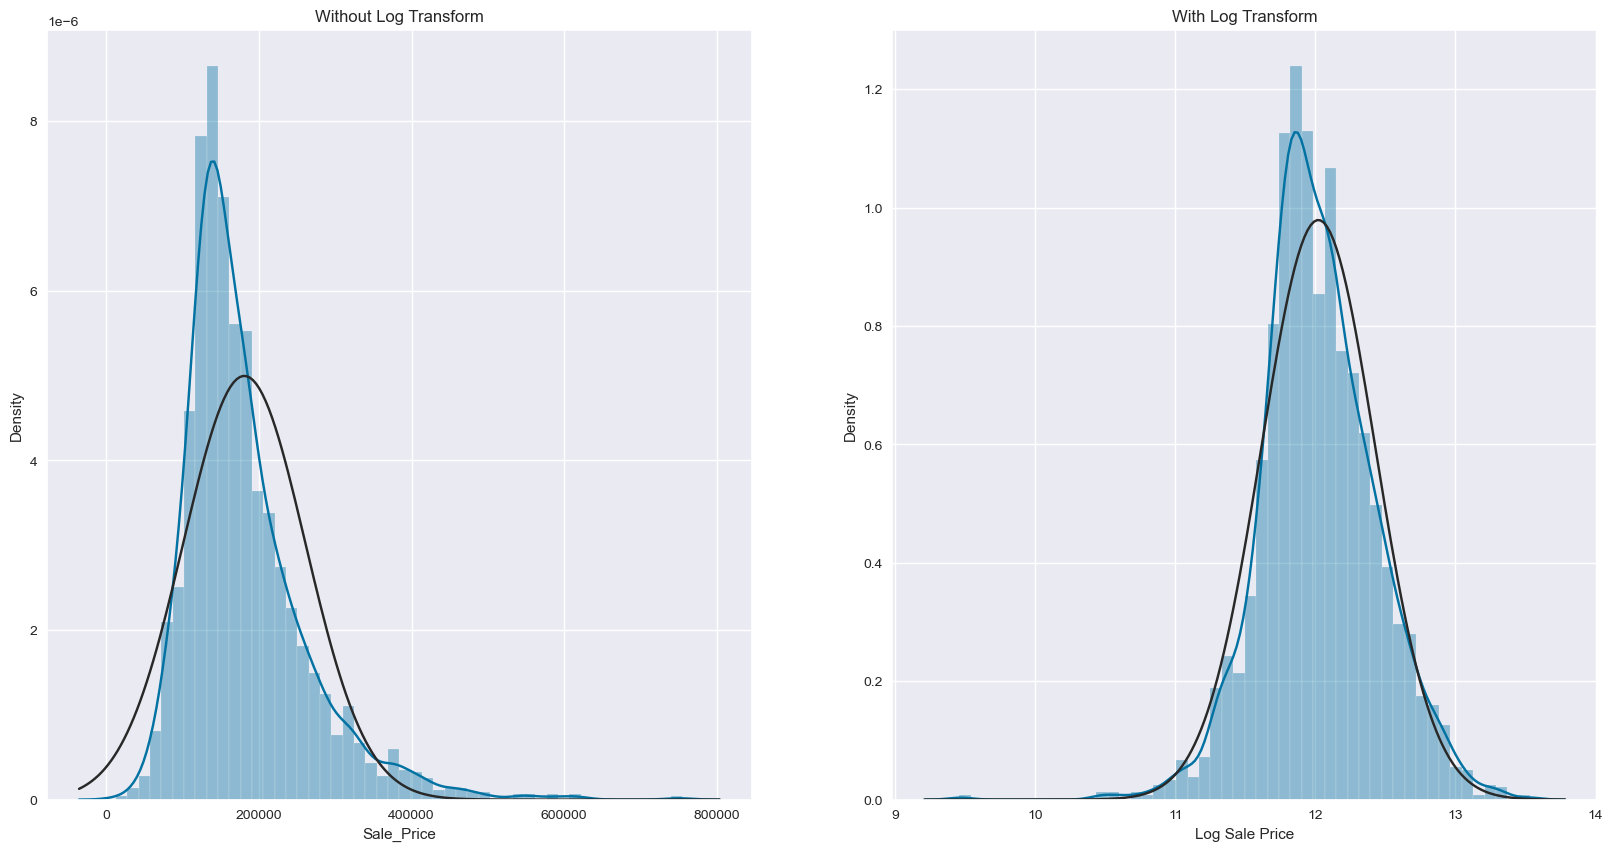

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")


plt.subplot(1,2,2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log Sale Price")
plt.title("With Log Transform")

plt.show()

In [18]:
target1 = np.log(target)

In [ ]:
# Model Selaction

In [77]:
train = dfnum2.drop(["Sale_Price"], axis=1)

In [226]:
#setup(data=pd.concat([train,target1], axis=1), target="Sale_Price")

In [21]:
compare_models()

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [76]:

from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split, KFold, cross_val_score



# Data Split

In [78]:
# data preparation
dataset = dfnum2.copy()

# get features
# remove sale price
#X = dataset.iloc[:,0:]
#X = dataset.drop(["Sale_Price"],axis=1)
X = train

print("X shape", X.shape)

# get target
y = target1
#y = dataset["Sale_Price"]

#y = dataset.iloc[:,0]

print("y shape", y.shape)

X shape (2930, 352)
y shape (2930,)


In [79]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=4)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2197, 352) (733, 352) (2197,) (733,)


In [141]:
targetIndex = y_test.index
targetIndex = pd.Series(a, name="Index")
targetIndex

0      2465
1       714
2      2905
3      2043
4       672
       ... 
728     662
729    1141
730    2057
731     120
732    2004
Name: Index, Length: 733, dtype: int64

# Base Model

In [131]:
a

RangeIndex(start=0, stop=2930, step=1)

In [80]:
basemodel = CatBoostRegressor(verbose=0)

In [81]:
basemodel.fit(X_train, y_train)

# Hyperparameter Encoding

In [231]:
import optuna

In [236]:
def br_objective(trial):
     n_iter = trial.suggest_int('n_iter', 50, 600)
     tol = trial.suggest_loguniform('tol', 1e-8, 10.0)
     alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 10.0)
     alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8, 10.0)
     lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8, 10.0)
     lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8, 10.0)
    
     model = BayesianRidge(
         n_iter=n_iter,
         tol=tol,
         alpha_1=alpha_1,
         alpha_2=alpha_2,
         lambda_1=lambda_1,
         lambda_2=lambda_2
     )
    
     model.fit(X_train, y_train)
    
     cv_scores = np.exp(np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    
     return np.mean(cv_scores)

In [237]:
study = optuna.create_study(direction='minimize')
study.optimize(br_objective, n_trials=100)


[I 2023-03-13 21:33:44,168] A new study created in memory with name: no-name-31851975-2e99-4880-9c90-d000b76855d8
[I 2023-03-13 21:33:49,064] Trial 0 finished with value: 1.1511493862847009 and parameters: {'n_iter': 86, 'tol': 0.05792555192626608, 'alpha_1': 0.11085646633283833, 'alpha_2': 0.06070378613094264, 'lambda_1': 4.641160017285905e-08, 'lambda_2': 3.30035944097289e-06}. Best is trial 0 with value: 1.1511493862847009.
[I 2023-03-13 21:33:53,285] Trial 1 finished with value: 1.1511170269796376 and parameters: {'n_iter': 548, 'tol': 0.44970914349219215, 'alpha_1': 4.072827724294735e-08, 'alpha_2': 0.015897132792477096, 'lambda_1': 6.654081128917994, 'lambda_2': 4.645033017254254e-05}. Best is trial 1 with value: 1.1511170269796376.
[W 2023-03-13 21:33:54,969] Trial 2 failed with parameters: {'n_iter': 245, 'tol': 5.08323844403383e-08, 'alpha_1': 6.311607343187552e-06, 'alpha_2': 5.946184157948096e-07, 'lambda_1': 6.385473630094619e-07, 'lambda_2': 3.470718926971748e-06} because 

KeyboardInterrupt: 

In [238]:
study.best_params

{'n_iter': 548,
 'tol': 0.44970914349219215,
 'alpha_1': 4.072827724294735e-08,
 'alpha_2': 0.015897132792477096,
 'lambda_1': 6.654081128917994,
 'lambda_2': 4.645033017254254e-05}

# Bagging Ensemble

In [241]:
models = {
    "catboost" : CatBoostRegressor(verbose=0),
    "catboostV2" : CatBoostRegressor(**catboost_params, verbose=0),
    "br" : BayesianRidge(),
    "lightgbm" : LGBMRegressor(),
    "ridge" : Ridge(),
    "omp" : OrthogonalMatchingPursuit()
}

In [239]:
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}

br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}

In [242]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " was trained")
    

catboost was trained
catboostV2 was trained
br was trained
lightgbm was trained
ridge was trained
omp was trained


# Evaluate

In [244]:
result = {}
model = models["catboost"]
kf = KFold(n_splits=10)

result = np.exp(np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)))


array([1.1189859 , 1.15103806, 1.13003028, 1.12436164, 1.11008838,
       1.15943995, 1.1179268 , 1.16441046, 1.12769699, 1.13183053])

In [245]:
np.mean(result)

1.1335808973327093

In [252]:
result_test = np.exp(np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=kf)))
np.mean(result_test)

1.1269709825365315

In [261]:
result_test2 = np.exp(np.sqrt(-cross_val_score(model, predictions0, y_test, scoring="neg_mean_squared_error", cv=kf)))
np.mean(result_test2)

TypeError: Singleton array 12.263884262957067 cannot be considered a valid collection.

In [247]:
predictions0 = (np.exp(models["catboost"].predict(X_test)))


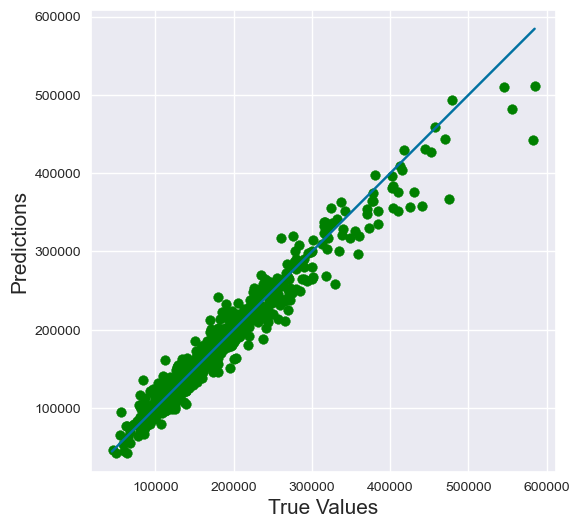

In [265]:
true_value = np.exp(y_test)
plt.figure(figsize=(6,6))


plt.scatter(true_value, predicted_value, c='green')
#plt.yscale('log')
#plt.xscale('log')


p1 = max(max(predictions0), max(true_value))
p2 = min(min(predictions0), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [253]:
result = {}
model = models["catboostV2"]
kf = KFold(n_splits=10)

result_test2 = np.exp(np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=kf)))
np.mean(result_test2)

1.1240133421729372

In [254]:
predictions1 = (np.exp(models["catboostV2"].predict(X_test)))
true_value = np.exp(y_test)

In [271]:
print(true_value.shape, predictitons1.shape)

(733,) (733,)


In [292]:
from sklearn.metrics import r2_score

# y_true: actual values of the target variable
# y_pred: predicted values of the target variable
r2cb = r2_score(true_value, predictions0)
r2cbv2 = r2_score(true_value, predictions1)
print('R-squared:' + r2cb.astype(str) + "||" + r2cbv2.astype(str))

R-squared:0.9430733890007773||0.9428488140142384


In [287]:
from sklearn.metrics import mean_squared_error

# y_true: actual values of the target variable
# y_pred: predicted values of the target variable
mse = mean_squared_error(predictions0, true_value)
me = np.log(np.sqrt(mse))
print('Mean squared error:', me)

Mean squared error: 9.865552770773126


In [269]:
from sklearn.metrics import mean_squared_error

# y_true: actual values of the target variable
# y_pred: predicted values of the target variable
mse = mean_squared_error(true_value, predictions1)
rmse = np.sqrt(mse)
print('Root mean squared error:', rmse)

Root mean squared error: 19293.45862120276


In [270]:
from sklearn.metrics import mean_absolute_error

# y_true: actual values of the target variable
# y_pred: predicted values of the target variable
mae = mean_absolute_error(true_value, predictions1)
print('Mean absolute error:', mae)

Mean absolute error: 12898.961029337212


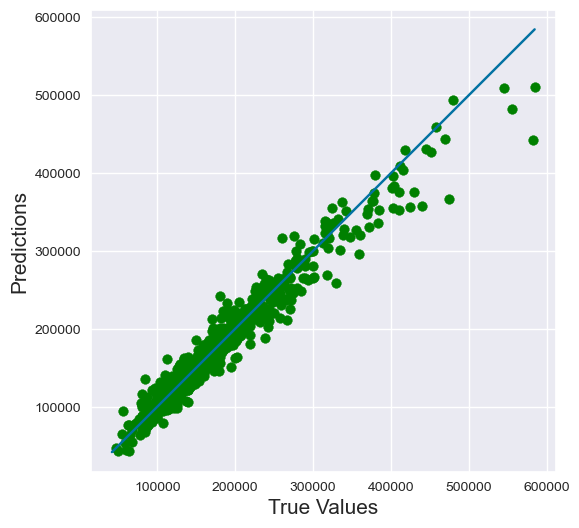

In [255]:

plt.figure(figsize=(6,6))


plt.scatter(true_value, predicted_value, c='green')
#plt.yscale('log')
#plt.xscale('log')


p1 = max(max(predictions1), max(true_value))
p2 = min(min(predictions1), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
np.mean(result)

In [105]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)))
    results[name] = result

In [94]:
results

{'catboost': array([1.1189859 , 1.15103806, 1.13003028, 1.12436164, 1.11008838,
        1.15943995, 1.1179268 , 1.16441046, 1.12769699, 1.13183053]),
 'br': array([1.13434953, 1.21364001, 1.15293842, 1.15944657, 1.10590173,
        1.1874169 , 1.14939661, 1.15583183, 1.13107348, 1.1216074 ]),
 'huber': array([10.21293705,  3.83490912,  4.28147542,  3.19349475,  2.19011297,
         7.51695084, 14.80048087,  1.14688504,  1.12590119,  2.3519223 ]),
 'ridge': array([1.13813528, 1.22257199, 1.15770799, 1.16469532, 1.10585299,
        1.20080152, 1.15126682, 1.15428222, 1.13686356, 1.13197706]),
 'omp': array([1.1429015 , 1.20818955, 1.15526048, 1.17102515, 1.11778338,
        1.17591668, 1.15676228, 1.17812641, 1.13803003, 1.14215972])}

In [83]:
np.exp(np.sqrt(np.mean(-results)))

1.1345141666674454

<Figure size 800x600 with 0 Axes>

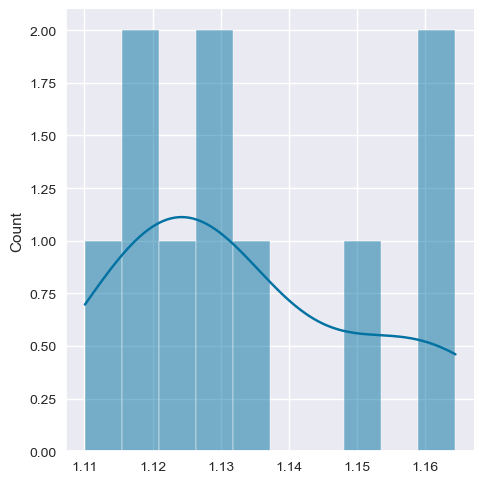

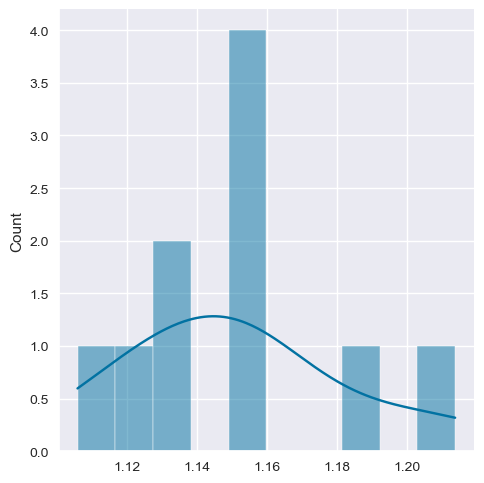

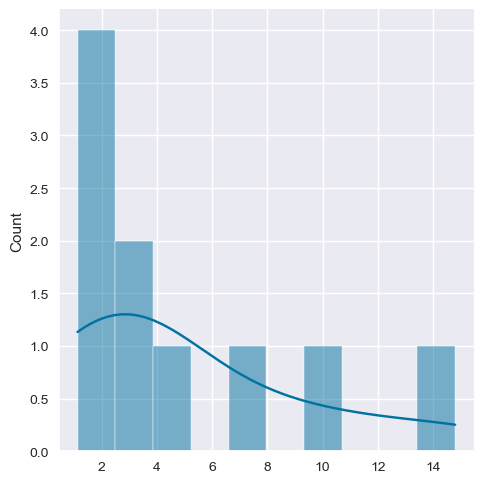

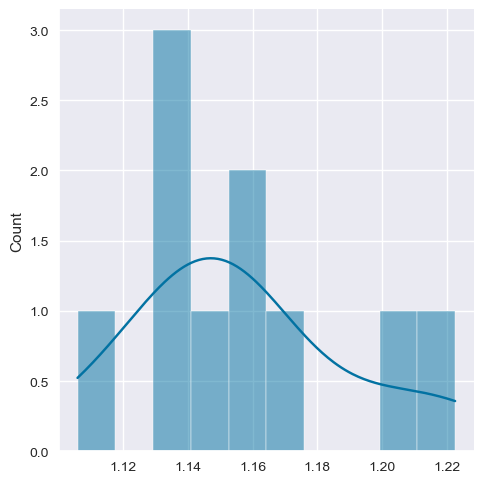

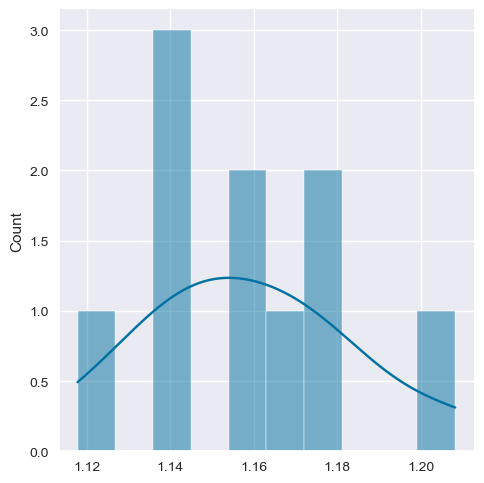

In [100]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    sns.displot(results[name], bins=10, kde=True, label=name)
    
plt.show()
    

In [106]:
for name, result in results.items():
    print("---------\n"+name+"\n--------")
    print(np.mean(result))
    print(np.std(result))

---------
catboost
--------
1.1335808973327093
0.017519000098998497
---------
br
--------
1.1511602473950906
0.029871068858208095
---------
lightgbm
--------
1.1462495487152373
0.014942291919042183
---------
ridge
--------
1.1564154751847397
0.03212216623512124
---------
omp
--------
1.1586155179687112
0.024320831897537153


# Predictons

In [228]:
predictions = (
    0.2 * np.exp(models["catboost"].predict(X_test)) +
    0.2 * np.exp(models["br"].predict(X_test)) +
    0.2 * np.exp(models["lightgbm"].predict(X_test)) +
    0.2 * np.exp(models["ridge"].predict(X_test)) +
    0.2 * np.exp(models["omp"].predict(X_test)) 
)


In [114]:
predictions

array([196871.34185872, 113162.44134501, 156367.82696419,  42944.1819796 ,
       153356.15715818, 176470.54069854, 181705.71336278, 150514.54498825,
       118363.28304944, 135968.34374263, 189029.27702109, 119903.05154071,
       134800.83433455, 290302.17850938, 165621.76820346, 171114.24370378,
       265429.9398949 , 120976.53148106,  63268.38309722, 180887.12575649,
       151276.95884127, 172509.05914855, 151948.62923272, 107513.15963918,
       111144.65453648, 265229.84013063, 175776.93479567, 179059.83018841,
        44460.32250281, 374230.26987919, 182314.22392714, 328650.29300504,
       112674.88393538, 158408.17203811, 185972.3765397 , 199180.61719194,
       153532.98059278, 214854.03631288, 208873.87150919, 162763.01090798,
       245169.15101674, 172484.95704877, 128966.28175705, 109591.49801705,
       212643.66970223, 190403.1872027 , 128081.93816378, 174556.81265157,
       250527.98148579, 139228.42363625, 242406.36977327, 183310.27124416,
       174900.32416471, 2

In [177]:
predictions002 = pd.Series(predictions, name="PredictedSalePrice")
predictions002.index = y_test.index
predictions002 = pd.concat([predictions002 , np.exp(y_test)], axis=1)
predictions002

PredictedSalePrice  Sale_Price
2465       196871.341859    200826.0
714        113162.441345    110001.0
2905       156367.826964    164001.0
2043        42944.181980     50001.0
672        153356.157158    153001.0
...                  ...         ...
662         53810.419331     59001.0
1141       212207.459649    193501.0
2057       126558.164690    119901.0
120        149985.875316    159001.0
2004       119676.187866    110001.0

[733 rows x 2 columns]

In [213]:
predicted_value = predictions
true_value = np.exp(y_test.values)
print(predicted_value.astype(int))

[196871 113162 156367  42944 153356 176470 181705 150514 118363 135968
 189029 119903 134800 290302 165621 171114 265429 120976  63268 180887
 151276 172509 151948 107513 111144 265229 175776 179059  44460 374230
 182314 328650 112674 158408 185972 199180 153532 214854 208873 162763
 245169 172484 128966 109591 212643 190403 128081 174556 250527 139228
 242406 183310 174900 299944 264199 114113 140823 169621 130425 396385
 140660  95227 118759 178819  46793 140419 123923 144169 129473 225717
 224432 108110 121227 254308 248400 188565 364562 246478 347362 163099
 149500 220243 181671 429862 182770 132257 169889 156786 127152 163333
 174371 363458 138025 367344 154686 119945 152491 202577 113604 201601
  55093 111823 124583 242898 245970  65017  81411 220427 265168 136876
 180500 127084 380731 225702 317336 251922 201134 154187 243655 161385
 173953 375856 190162 173048 233453 279924 397046 154188 201562 358044
 150503 430355 156248 237230 265245 251319 229786 236883 122511 284429
 12972

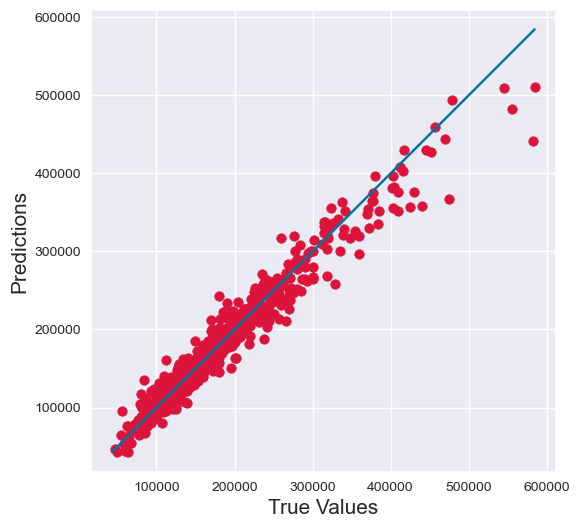

In [201]:
plt.figure(figsize=(6,6))


plt.scatter(true_value, predicted_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')


p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [260]:
y_pred = predictions1.astype(int)
acc = accuracy_score(np.array(y_test.astype(int)), np.array(y_pred))
acc

0

#Predicitons

In [257]:
np.exp(y_test)

2465    200826.0
714     110001.0
2905    164001.0
2043     50001.0
672     153001.0
          ...   
662      59001.0
1141    193501.0
2057    119901.0
120     159001.0
2004    110001.0
Name: Sale_Price, Length: 733, dtype: float64

In [258]:
y_pred

array([196880, 110677, 162209,  60889, 149305, 166124, 180590, 151931,
       120873, 132589, 183368, 117413, 140230, 281699, 169757, 174986,
       275271, 118891,  57276, 172760, 155823, 165952, 151313, 102007,
       117669, 265109, 178510, 183137,  41846, 368492, 180591, 322851,
       108947, 161619, 189060, 211921, 150123, 216229, 207196, 152826,
       267991, 178879, 130386, 116364, 203452, 179339, 129377, 172642,
       241863, 139514, 239099, 179687, 172470, 300605, 270012, 114897,
       138882, 164119, 124997, 385816, 137655,  87892, 119472, 182613,
        48455, 142365, 126692, 144676, 124406, 215599, 237440, 110363,
       123135, 258144, 244946, 187354, 380959, 248881, 366272, 154324,
       150607, 216668, 187418, 454960, 165745, 132052, 177671, 155278,
       125757, 157304, 176246, 349770, 135158, 316719, 161091, 120234,
       146978, 207357, 109458, 203153,  65768, 113610, 124977, 238037,
       237470,  70554,  84681, 221551, 283291, 132810, 178973, 125420,
      

Predictions

In [5]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['Year_Built', 'Year_Remod_Add', 'Year_Sold']

In [6]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, df_data[feature].unique())

Year_Built [1960. 1961. 1958. 1968. 1997. 1998. 2001. 1992. 1995. 1999. 1993. 1990.
 1985. 2003. 1988. 2010. 1951. 1978. 1977. 1974. 2000. 1970. 1971. 1975.
 2009. 2007. 2005. 2004. 2002. 2006. 1996. 1994. 2008. 1980. 1979. 1984.
 1920. 1965. 1967. 1963. 1962. 1976. 1972. 1966. 1959. 1964. 1950. 1952.
 1949. 1940. 1954. 1955. 1957. 1956. 1953. 1948. 1900. 1910. 1927. 1915.
 1945. 1929. 1938. 1923. 1928. 1890. 1885. 1922. 1925. 1939. 1942. 1936.
 1930. 1921. 1912. 1917. 1907. 1875. 1969. 1947. 1946. 1987. 1941. 1924.
 1914. 1931. 1919. 1989. 1896. 1973. 1991. 1981. 1986. 1916. 1926. 1935.
 1892. 1898. 1880. 1882. 1937. 1902. 1934. 1982. 1983. 1932. 1918. 1904.
 1905. 1872. 1893. 1906. 1908. 1911. 1895. 1879. 1901. 1913.]
Year_Remod_Add [1960. 1961. 1958. 1968. 1998. 2001. 1992. 1996. 1999. 1994. 2007. 1990.
 1985. 2003. 2005. 2010. 1951. 1988. 1977. 1974. 2000. 1970. 2008. 1971.
 1975. 1978. 2006. 2004. 2002. 1995. 2009. 1980. 1979. 1984. 1981. 1950.
 1967. 1963. 1993. 1966. 1959. 1964.

Text(0.5, 1.0, 'House Price vs YearSold')

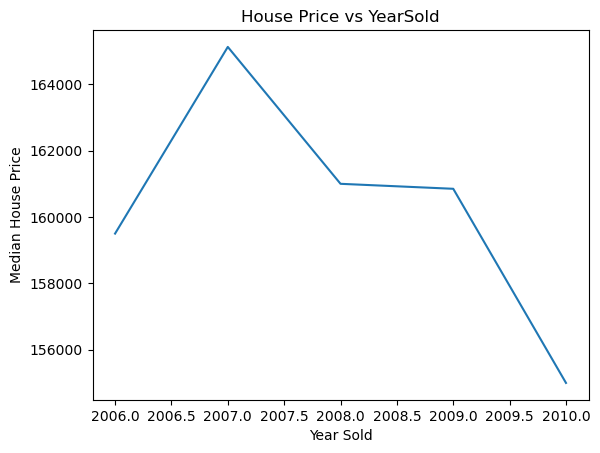

In [11]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df_data.groupby('Year_Sold')['Sale_Price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")



In [8]:
year_feature

['Year_Built', 'Year_Remod_Add', 'Year_Sold']

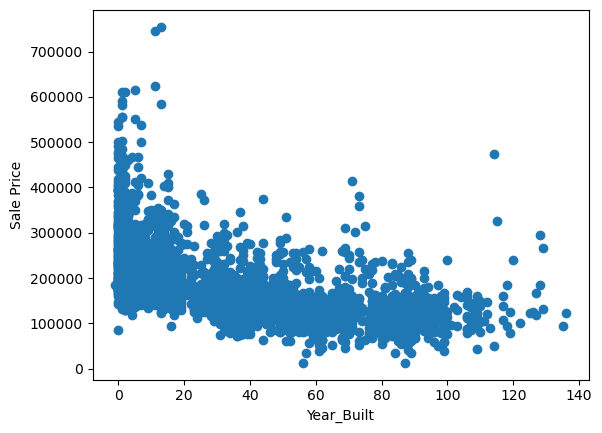

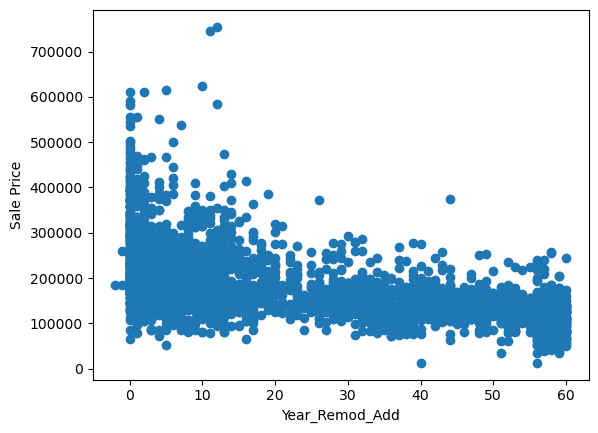

In [12]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='Year_Sold':
        data=df_data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['Year_Sold']-data[feature]

        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()


In [13]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df_data[feature].unique())<25 
                  and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 12


In [14]:
discrete_feature

['BsmtFin_SF_1',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Garage_Cars',
 'Pool_Area',
 'Mo_Sold']

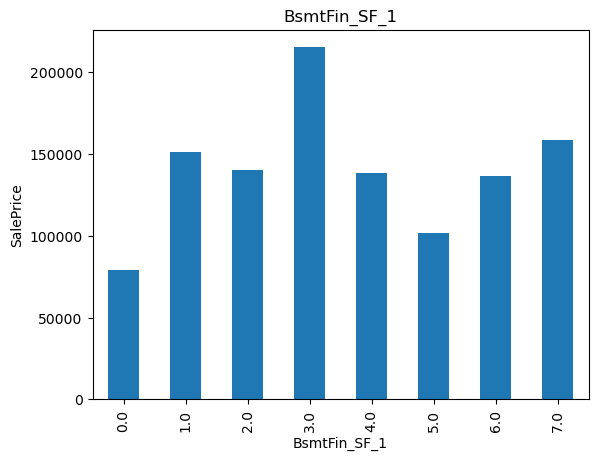

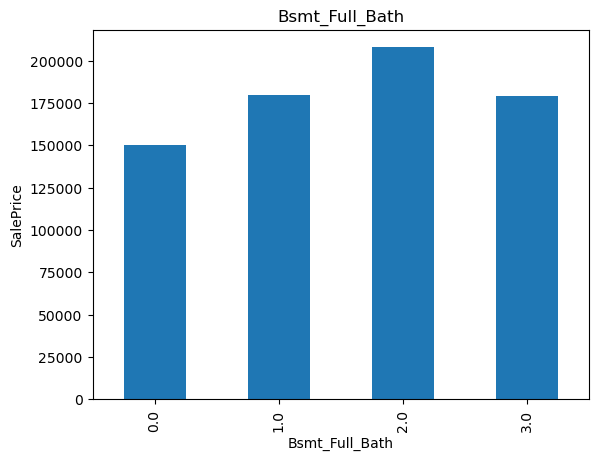

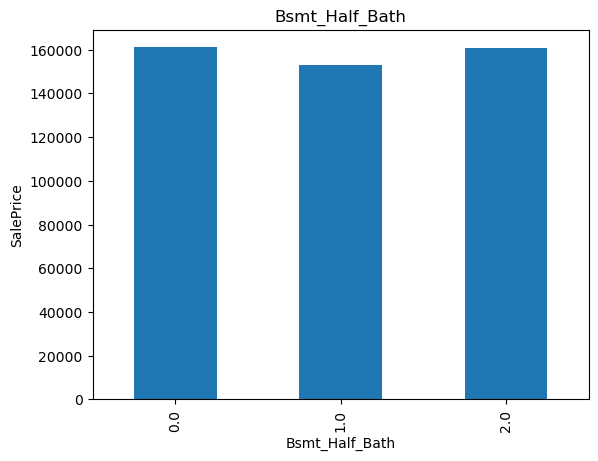

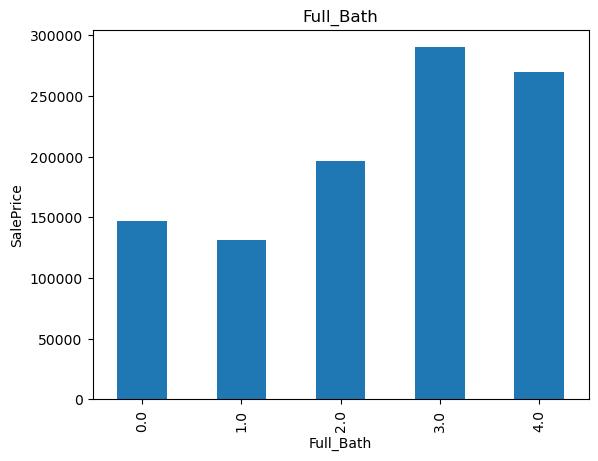

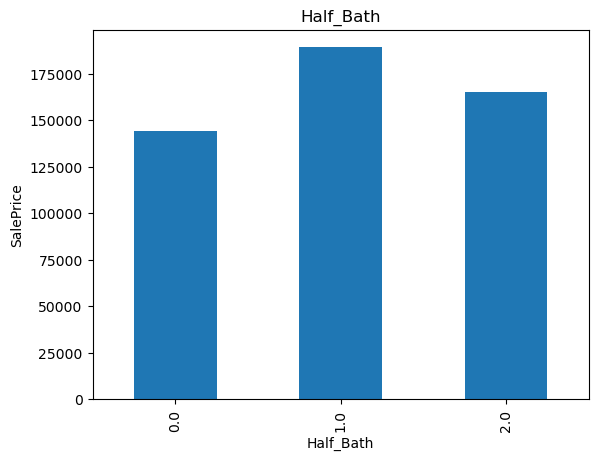

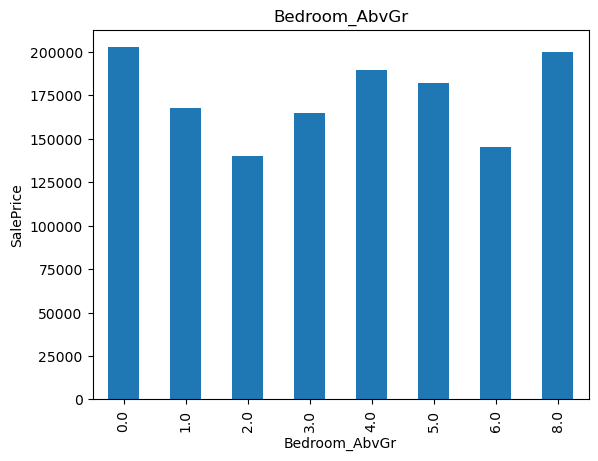

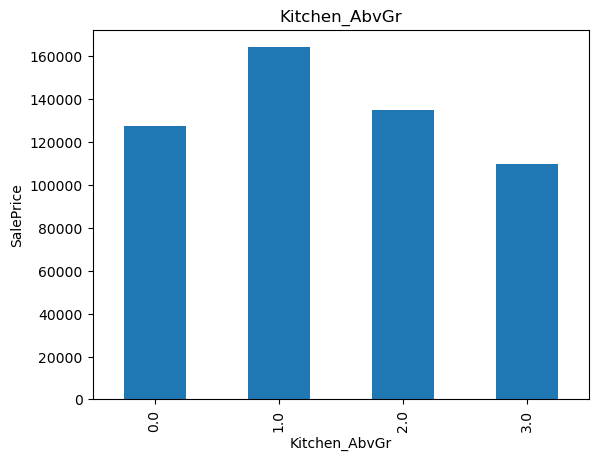

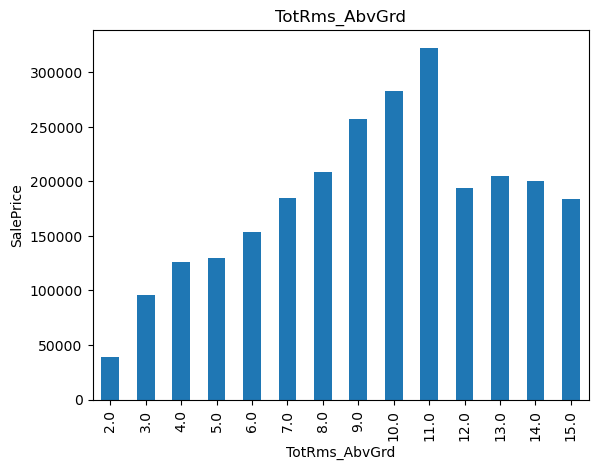

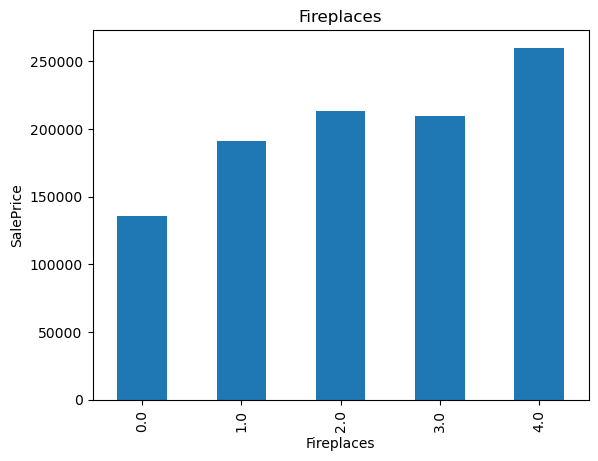

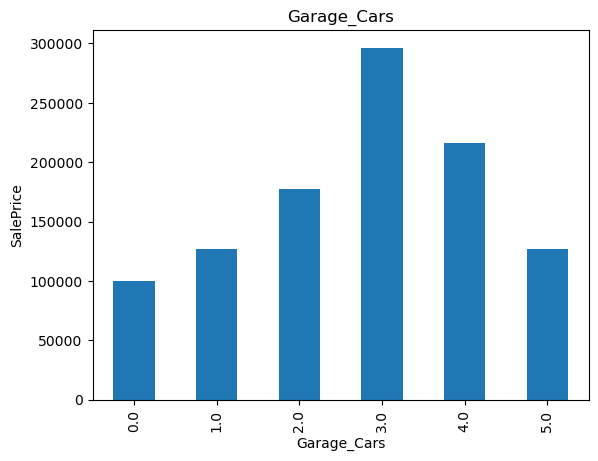

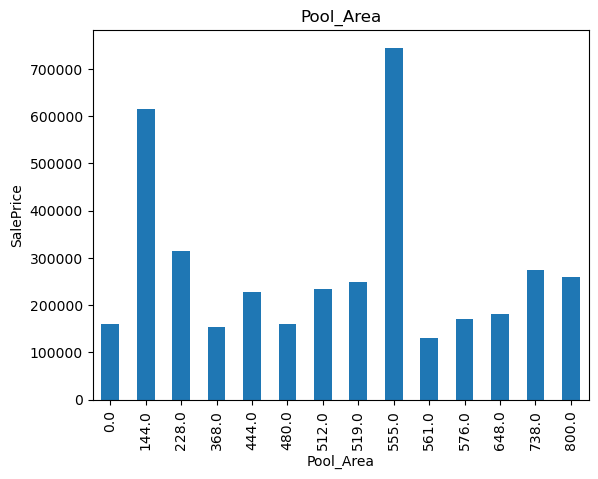

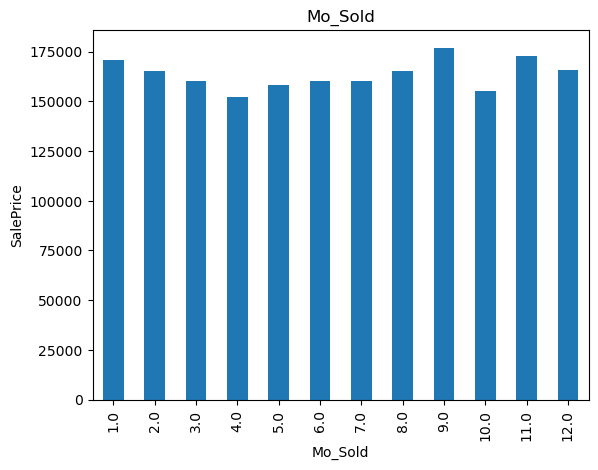

In [15]:
## Lets Find the relationship between them and Sale PRice

for feature in discrete_feature:
    data=df_data.copy()
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [929]:
#### Continuous Variable

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 20


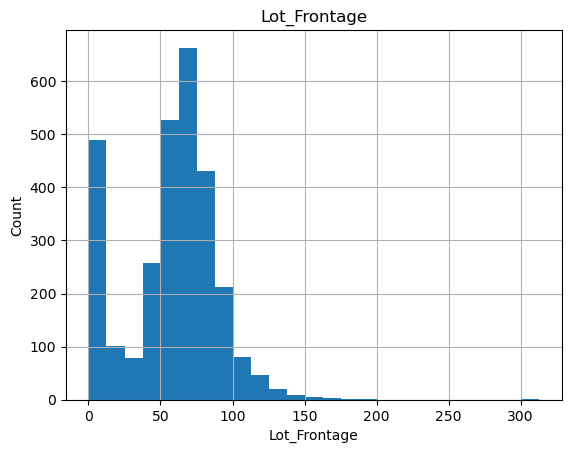

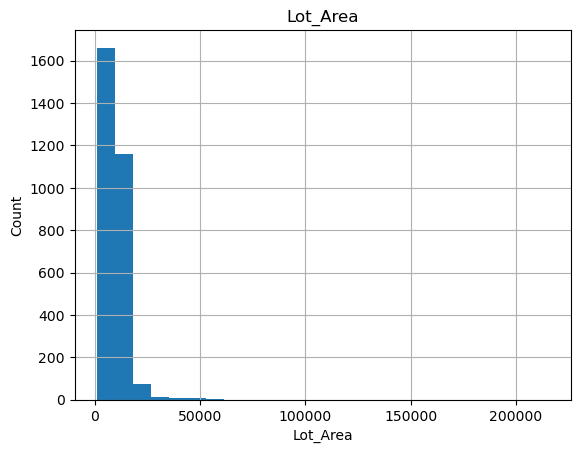

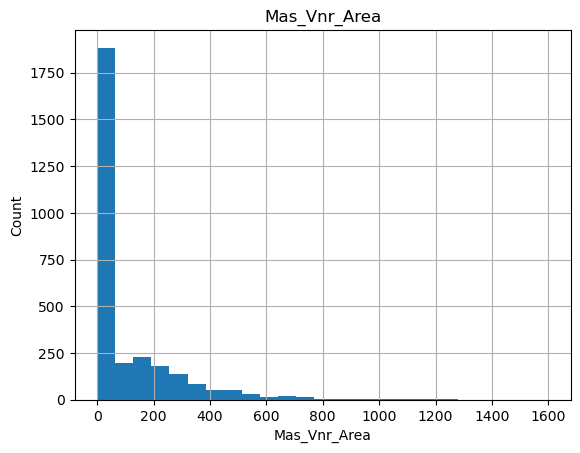

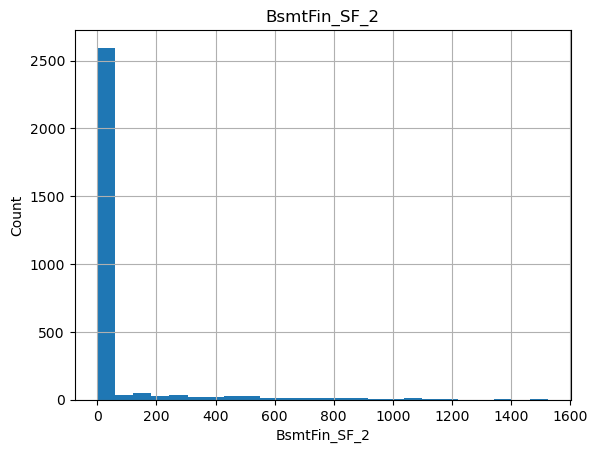

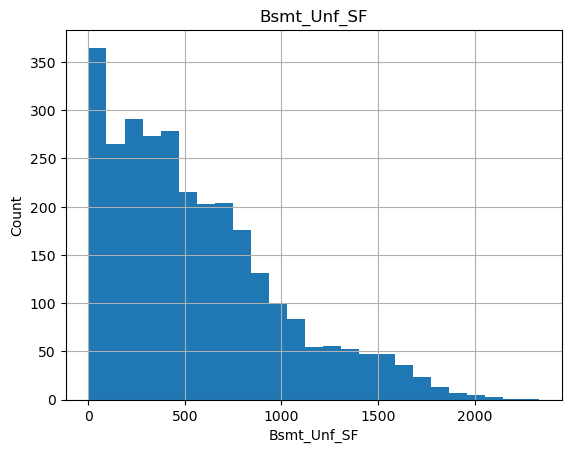

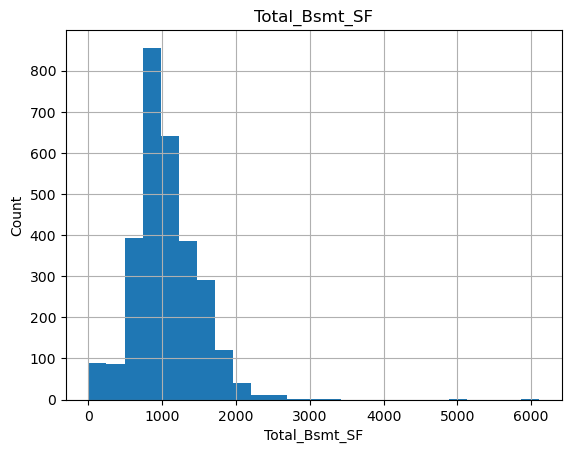

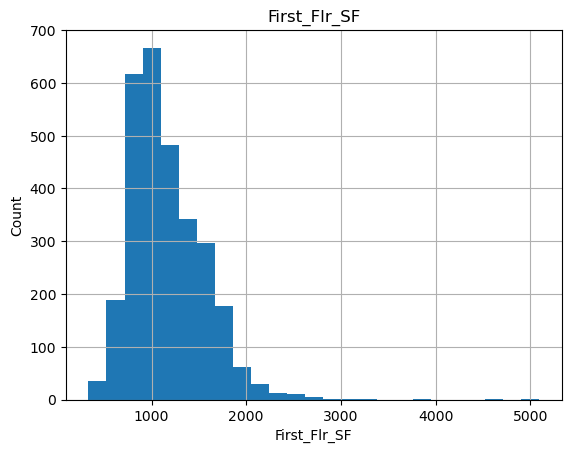

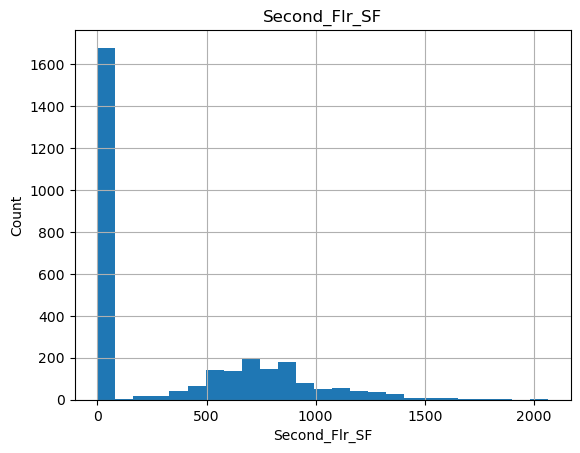

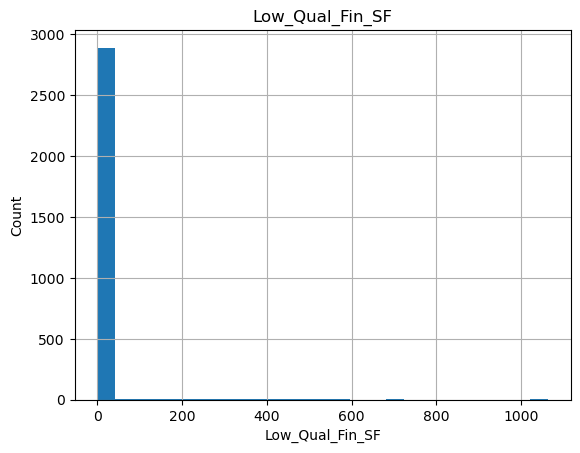

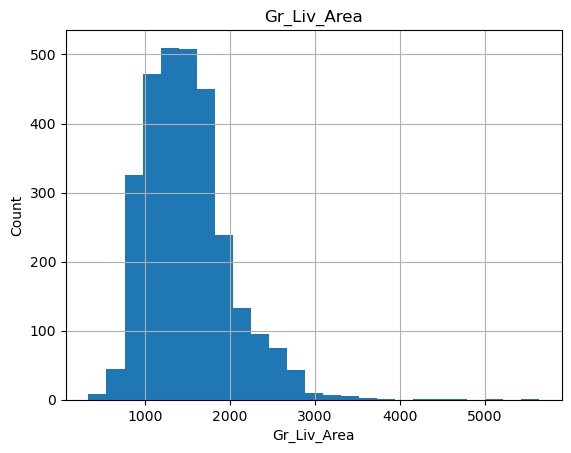

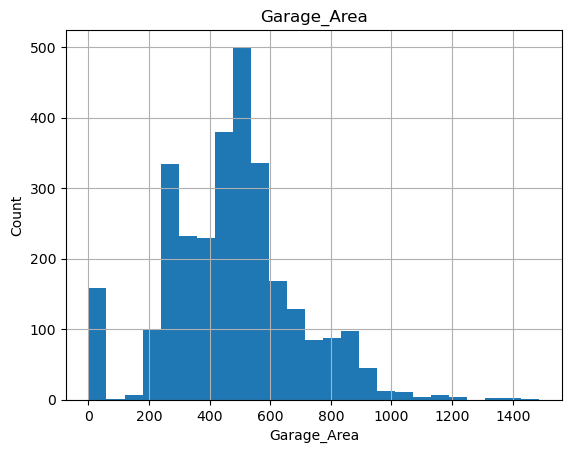

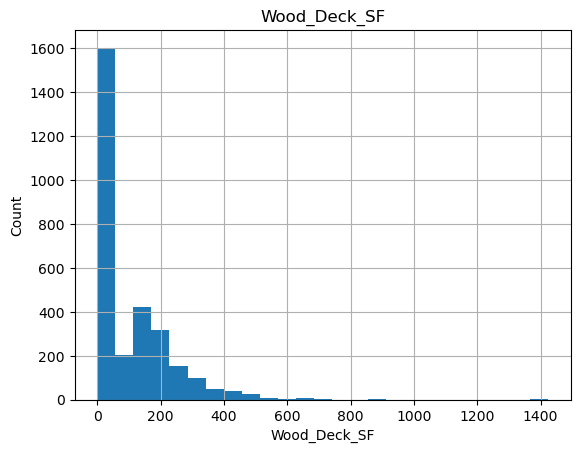

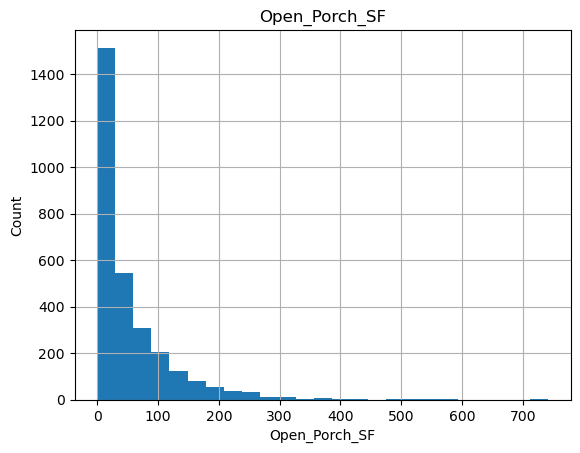

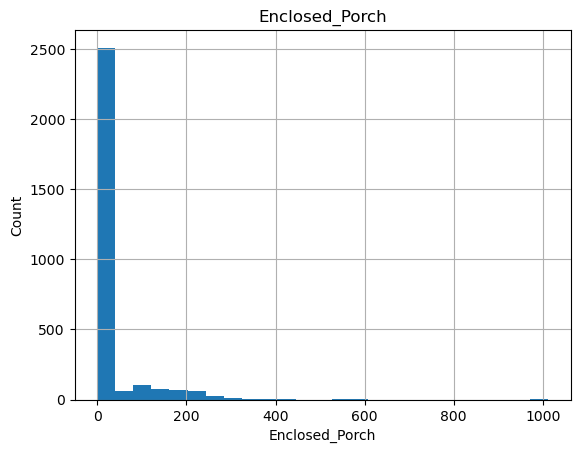

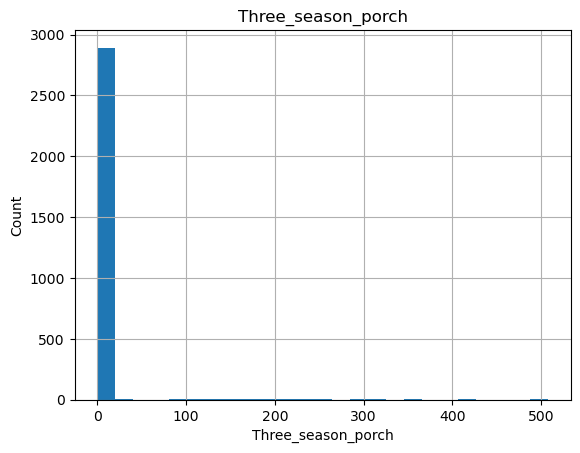

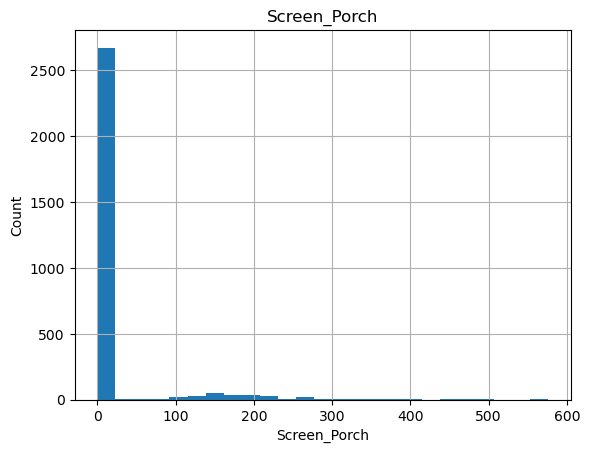

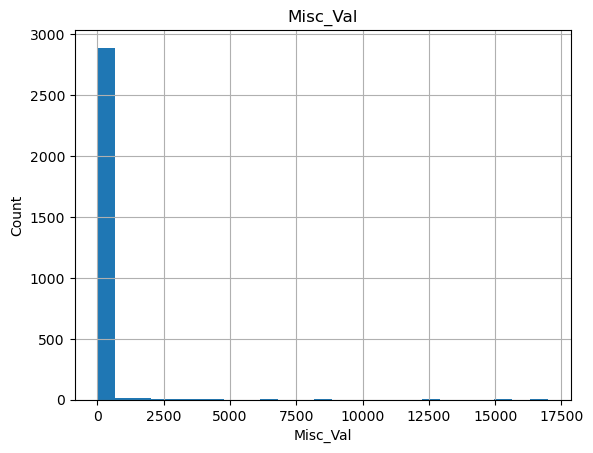

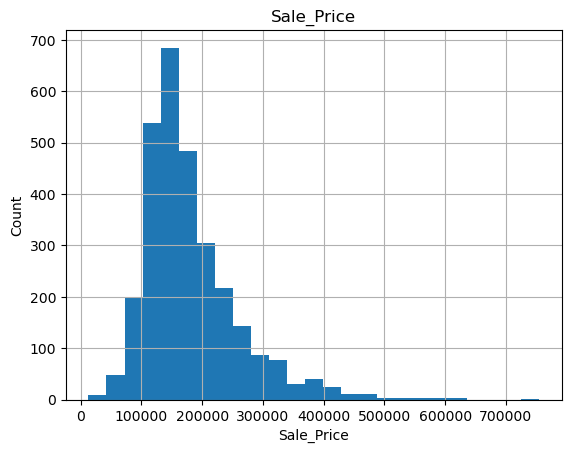

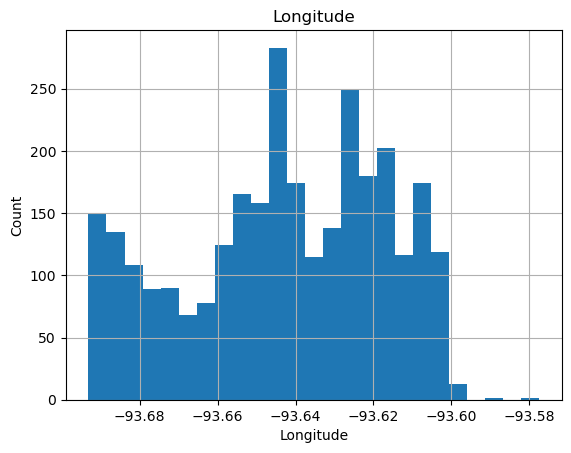

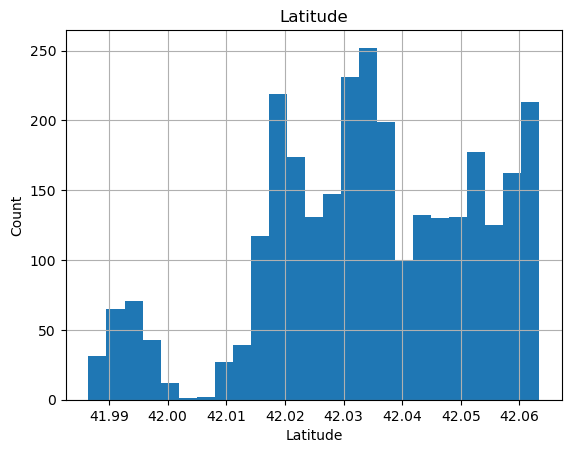

In [17]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

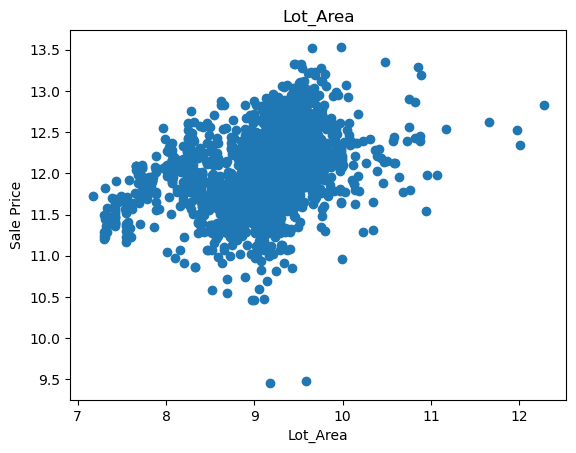

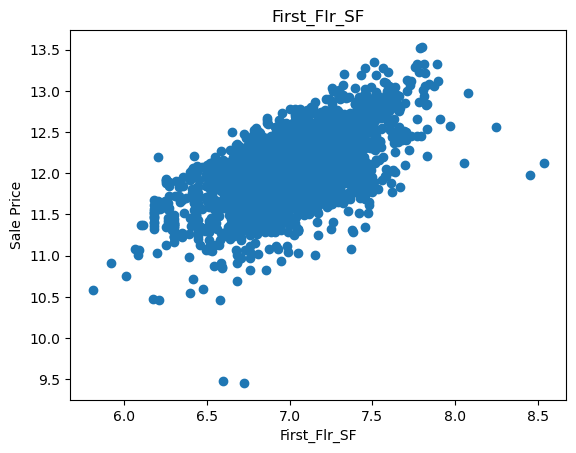

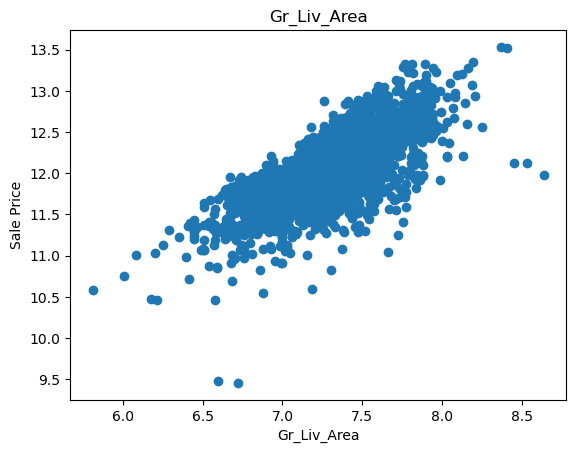

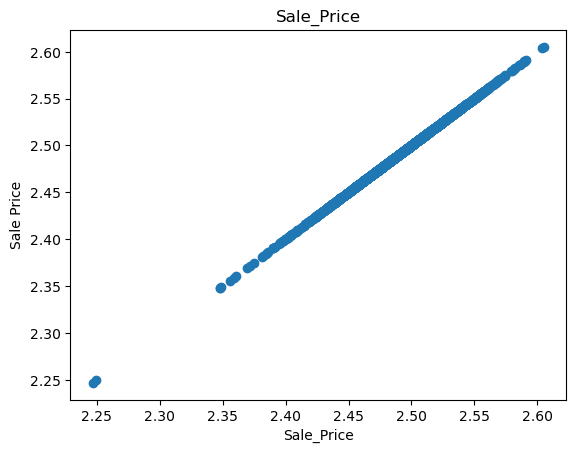

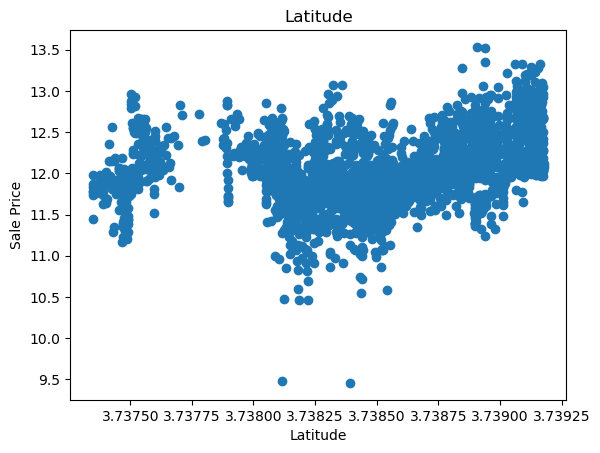

In [808]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=df_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Sale_Price']=np.log(data['Sale_Price'])
        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.title(feature)
        plt.show()

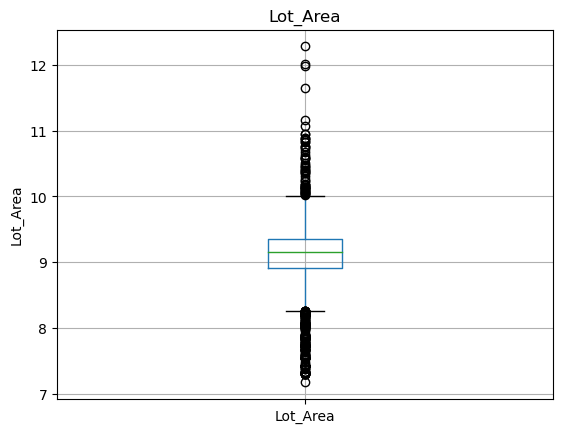

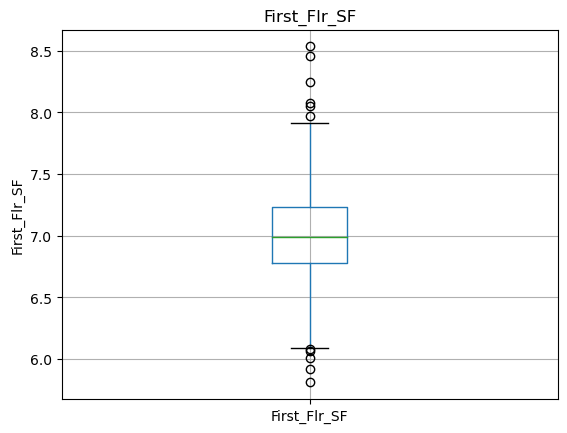

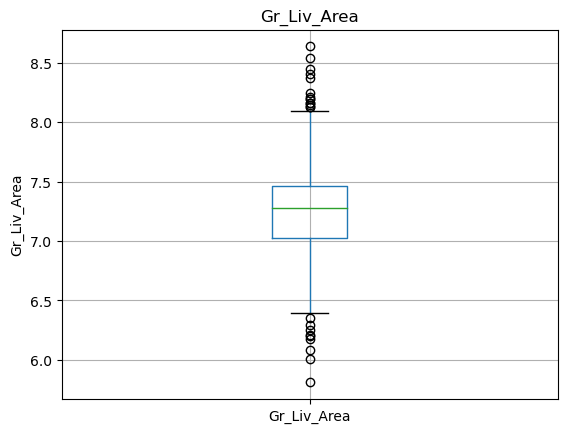

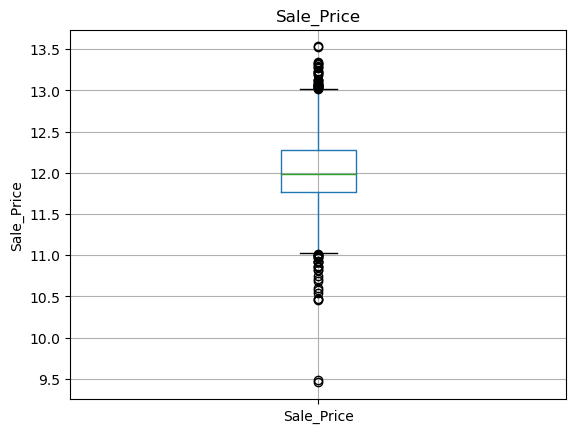

E:\Program Files\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


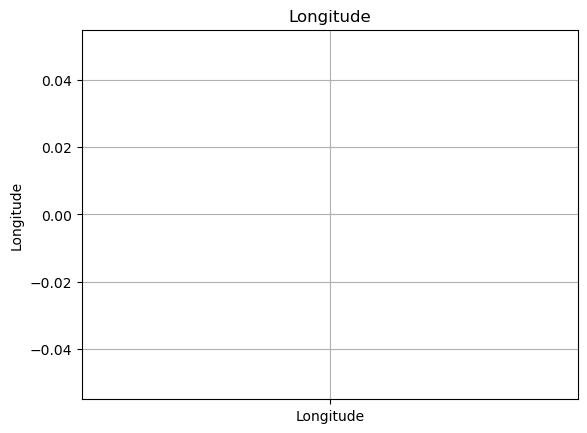

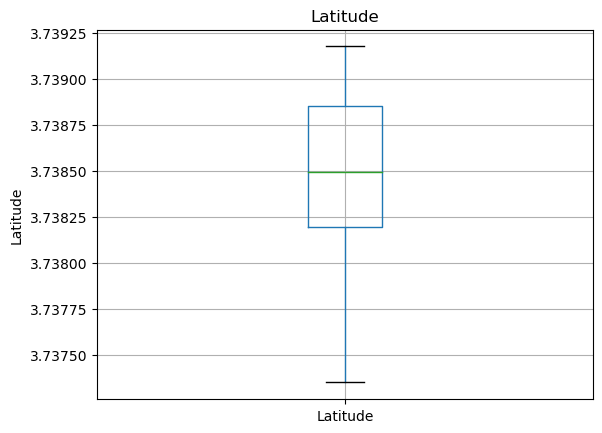

In [1090]:
for feature in continuous_feature:
    data=df_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [932]:
categorical_features=[feature for feature in df_data.columns if df_data[feature].dtypes=='O']
df_data[categorical_features].head()

MS_SubClass                    MS_Zoning  \
0  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
1  b'One_Story_1946_and_Newer_All_Styles'  b'Residential_High_Density'   
2  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
3  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
4             b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   

    Street               Alley              Lot_Shape Land_Contour  Utilities  \
0  b'Pave'  b'No_Alley_Access'  b'Slightly_Irregular'       b'Lvl'  b'AllPub'   
1  b'Pave'  b'No_Alley_Access'             b'Regular'       b'Lvl'  b'AllPub'   
2  b'Pave'  b'No_Alley_Access'  b'Slightly_Irregular'       b'Lvl'  b'AllPub'   
3  b'Pave'  b'No_Alley_Access'             b'Regular'       b'Lvl'  b'AllPub'   
4  b'Pave'  b'No_Alley_Access'  b'Slightly_Irregular'       b'Lvl'  b'AllPub'   

  Lot_Config Land_Slope   Neighborhood  ... Garage_Type Garage_Finish  \
0  b'Corner'     b'Gtl'  b'North_Ames'  ...   b'Attchd'        b'Fin'   
1  b'Inside'     b'Gtl'  b'North_Ames'  ...   b'Attchd'        b'Unf'   
2  b'Corner'     b'Gtl'  b'North_Ames'  ...   b'Attchd'        b'Unf'   
3  b'Corner'     b'Gtl'  b'North_Ames'  ...   b'Attchd'        b'Fin'   
4  b'Inside'     b'Gtl'     b'Gilbert'  ...   b'Attchd'        b'Fin'   

  Garage_Qual Garage_Cond          Paved_Drive     Pool_QC  \
0  b'Typical'  b'Typical'  b'Partial_Pavement'  b'No_Pool'   
1  b'Typical'  b'Typical'             b'Paved'  b'No_Pool'   
2  b'Typical'  b'Typical'             b'Paved'  b'No_Pool'   
3  b'Typical'  b'Typical'             b'Paved'  b'No_Pool'   
4  b'Typical'  b'Typical'             b'Paved'  b'No_Pool'   

                Fence Misc_Feature Sale_Type Sale_Condition  
0         b'No_Fence'      b'None'    b'WD '      b'Normal'  
1  b'Minimum_Privacy'      b'None'    b'WD '      b'Normal'  
2         b'No_Fence'      b'Gar2'    b'WD '      b'Normal'  
3         b'No_Fence'      b'None'    b'WD '      b'Normal'  
4  b'Minimum_Privacy'      b'None'    b'WD '      b'Normal'  

[5 rows x 46 columns]

In [1091]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_data[feature].unique())))

The feature is MS_SubClass and number of categories are 16
The feature is MS_Zoning and number of categories are 7
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is Lot_Shape and number of categories are 4
The feature is Land_Contour and number of categories are 4
The feature is Utilities and number of categories are 3
The feature is Lot_Config and number of categories are 5
The feature is Land_Slope and number of categories are 3
The feature is Neighborhood and number of categories are 28
The feature is Condition_1 and number of categories are 9
The feature is Condition_2 and number of categories are 8
The feature is Bldg_Type and number of categories are 5
The feature is House_Style and number of categories are 8
The feature is Overall_Qual and number of categories are 10
The feature is Overall_Cond and number of categories are 9
The feature is Roof_Style and number of categories are 6
The feature is Roof_Matl and 

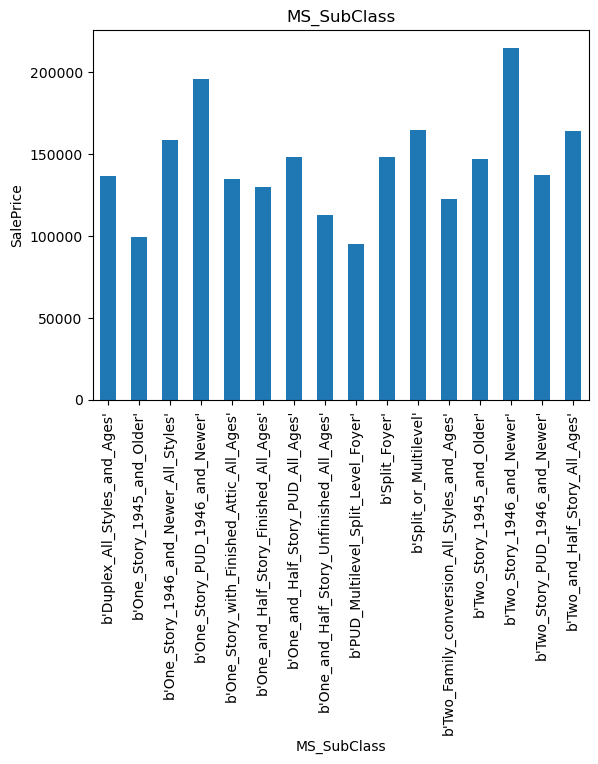

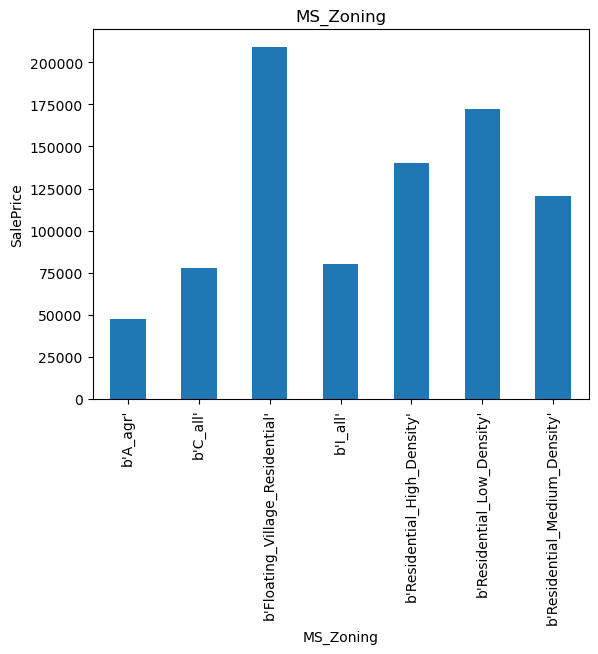

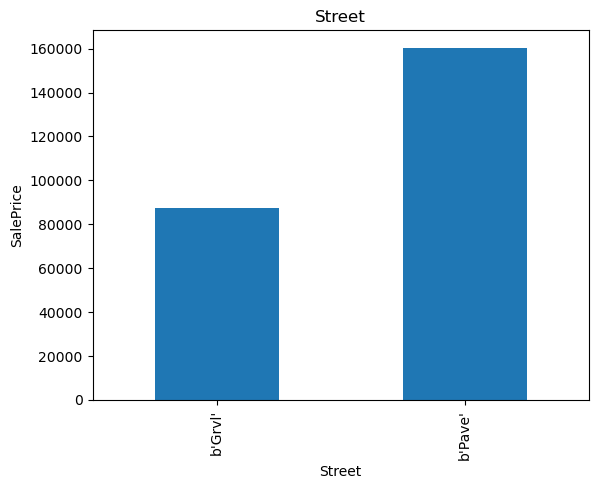

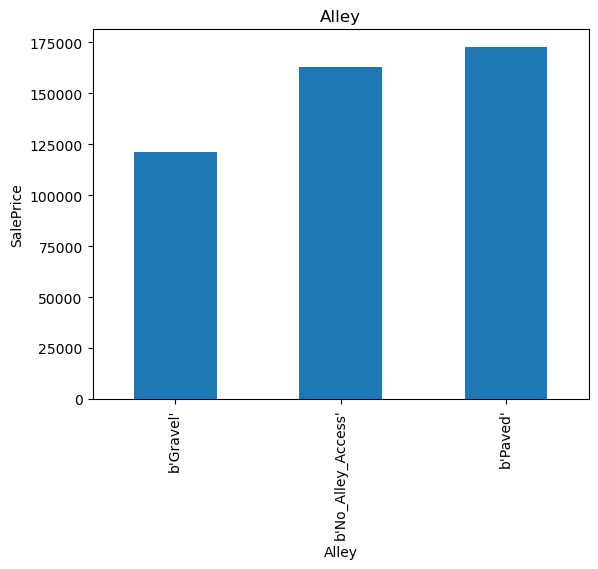

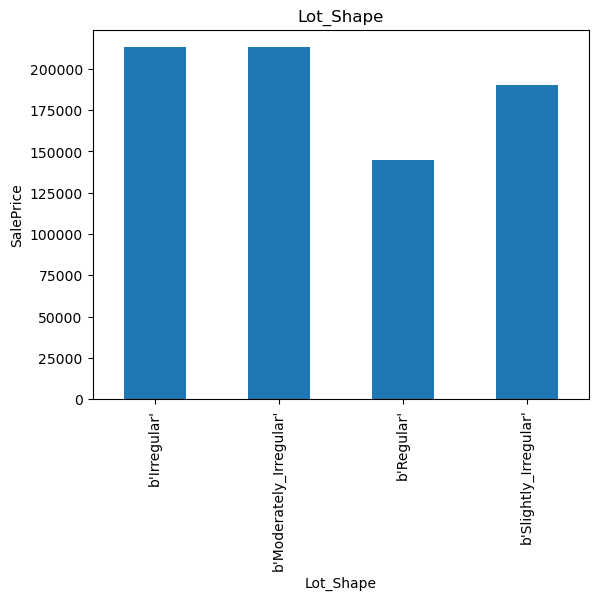

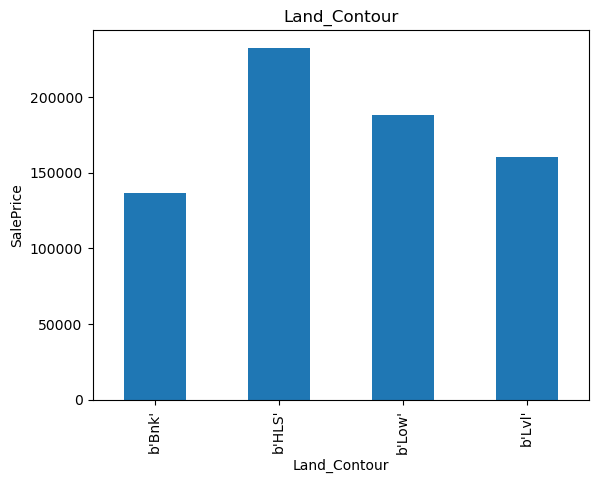

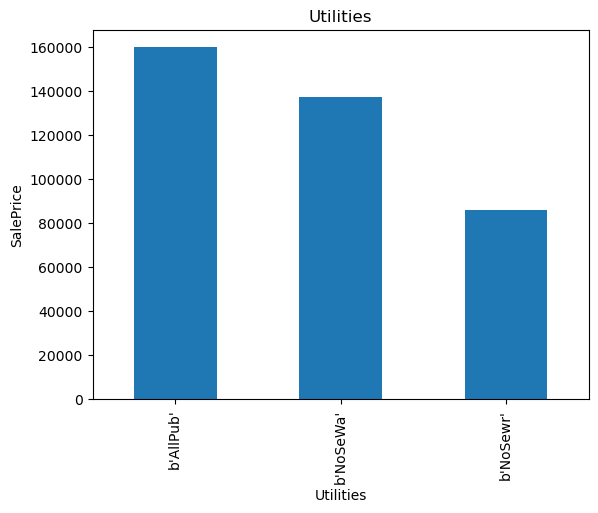

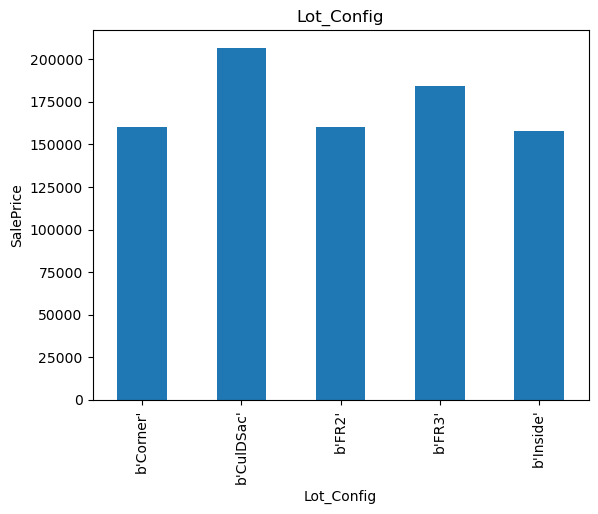

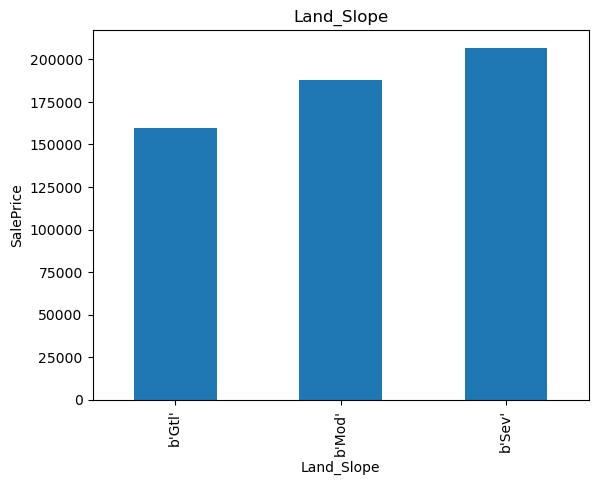

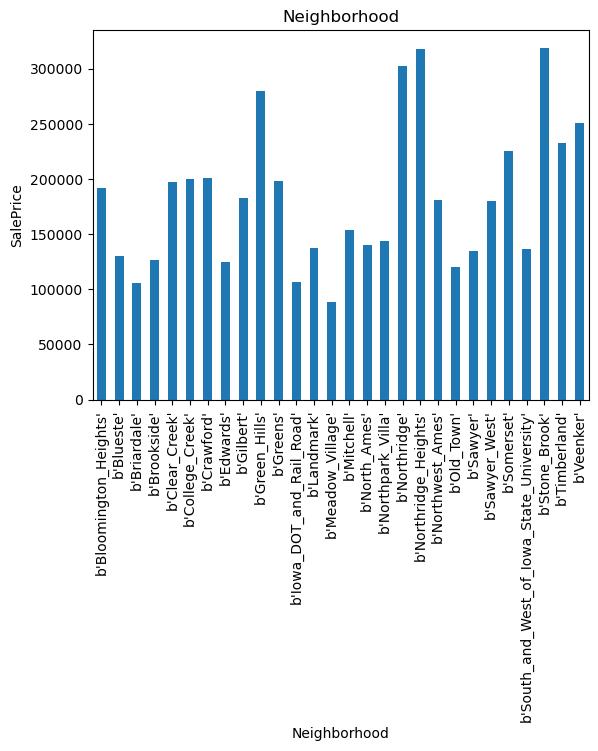

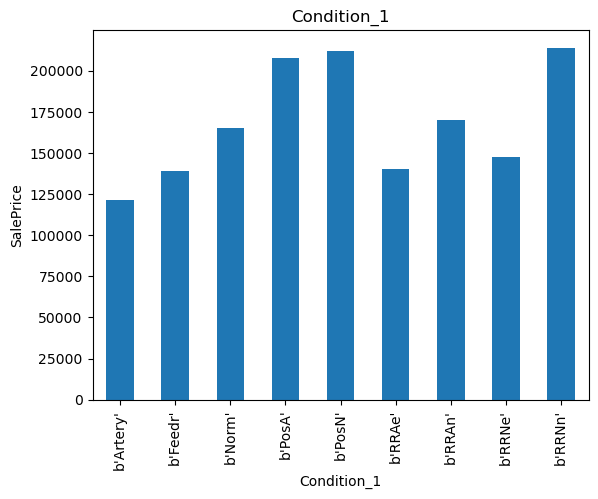

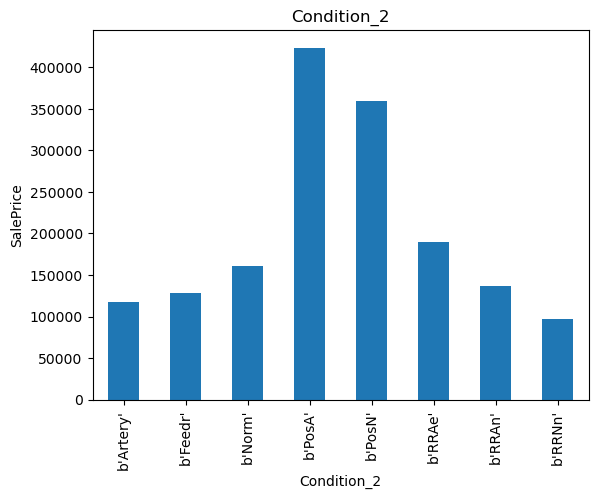

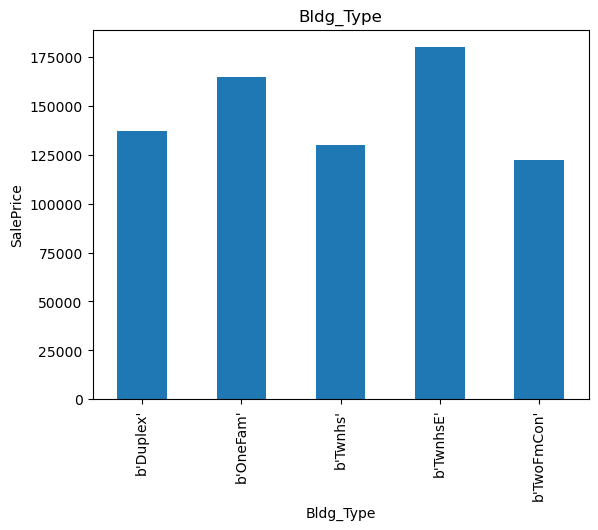

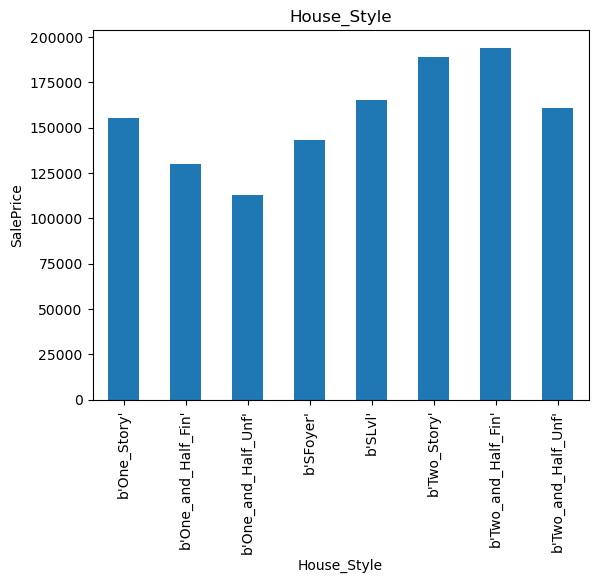

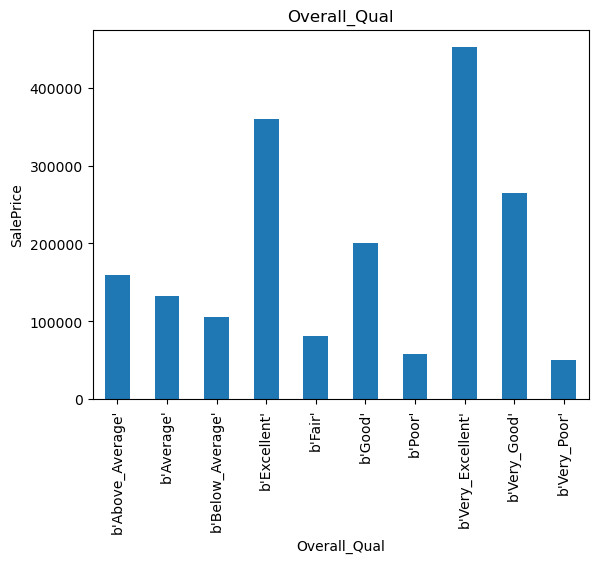

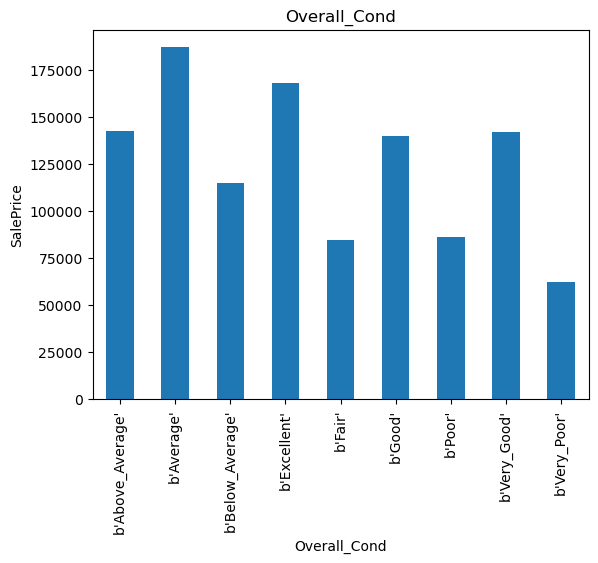

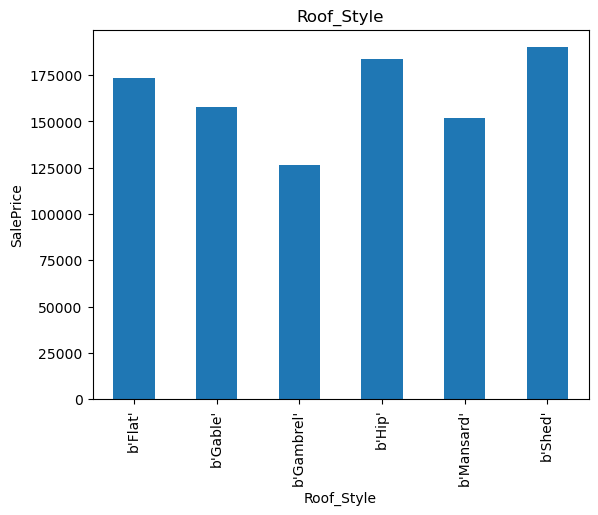

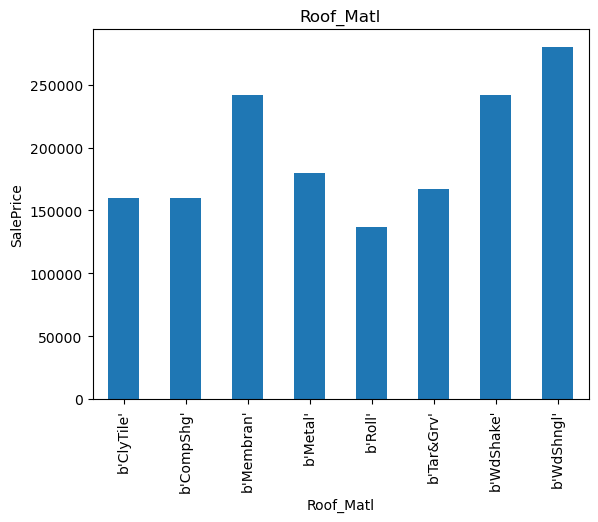

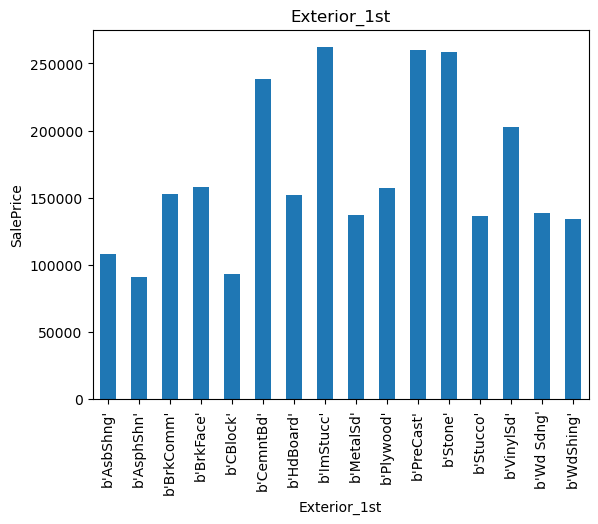

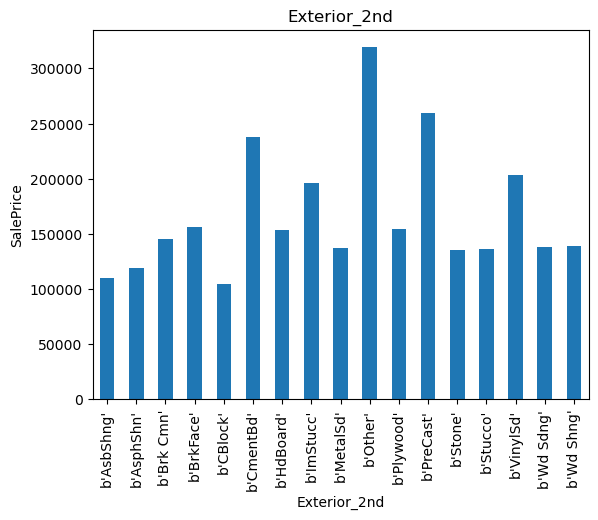

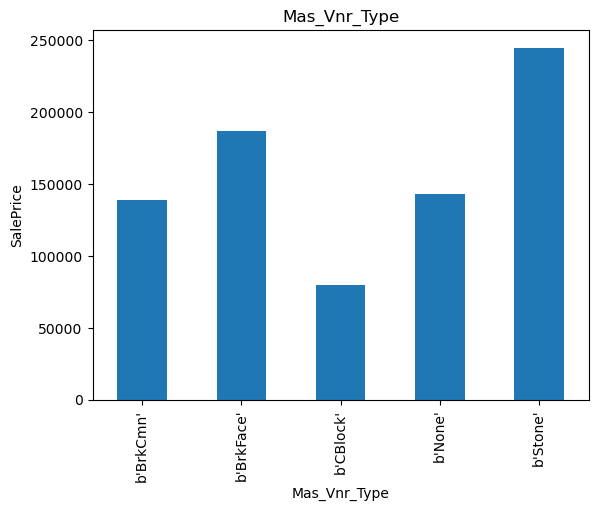

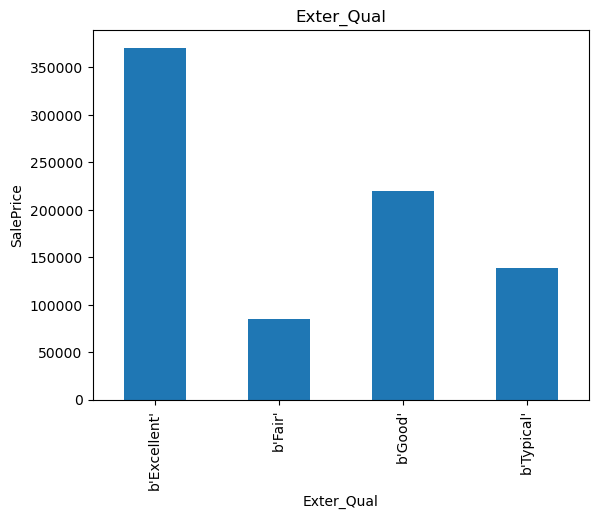

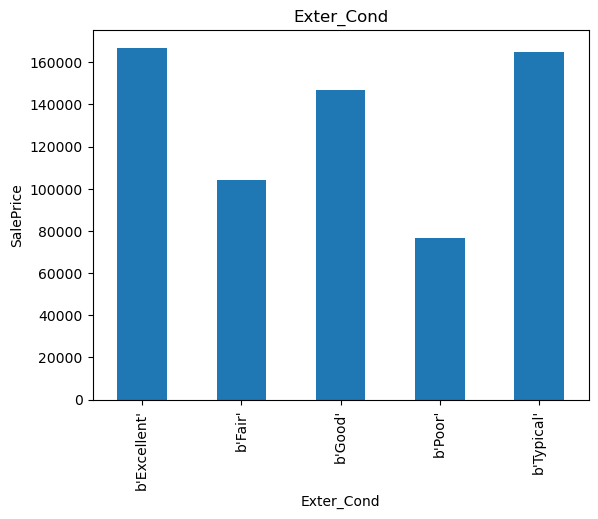

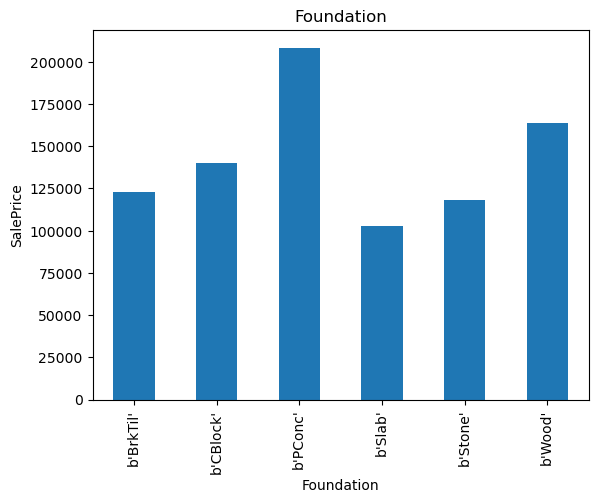

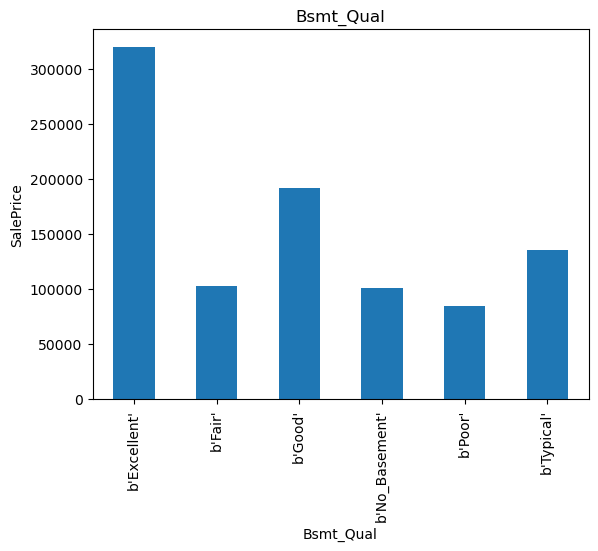

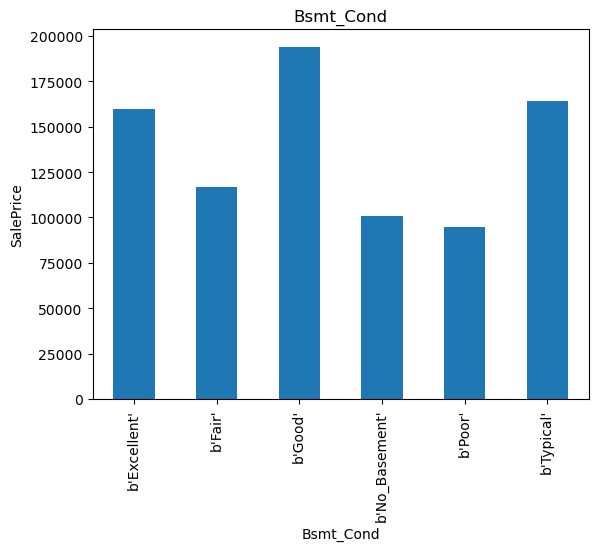

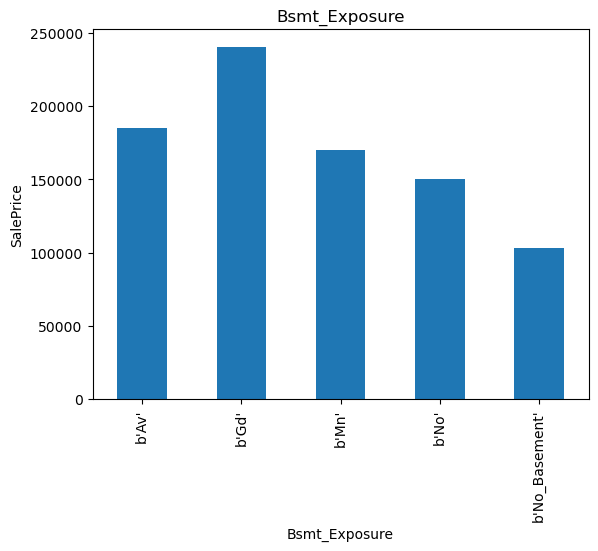

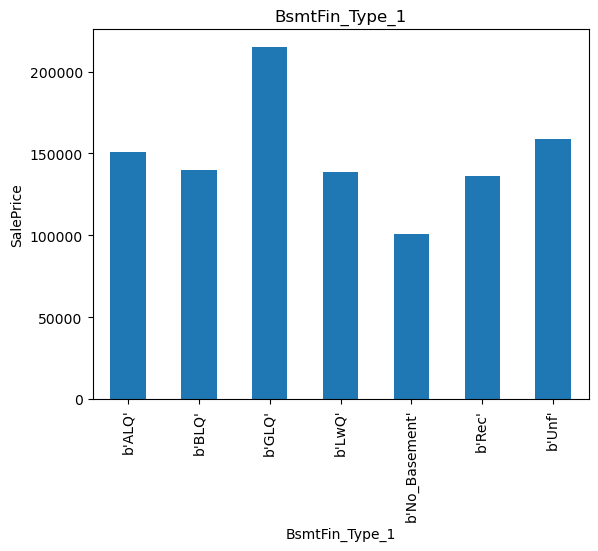

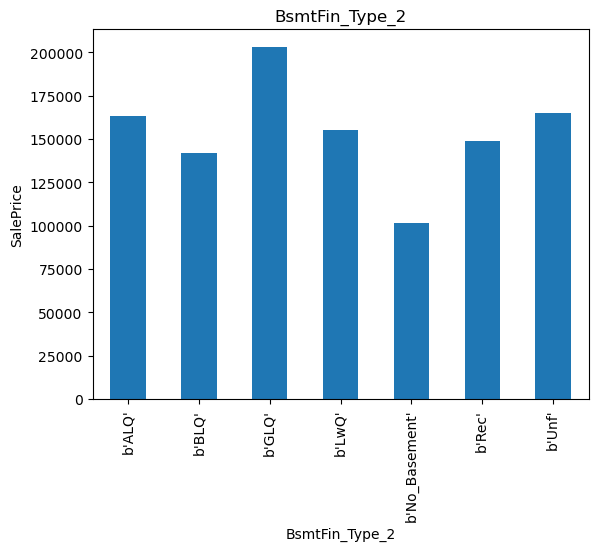

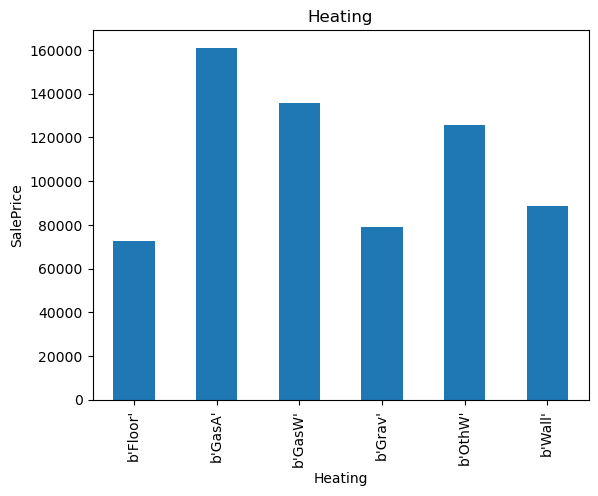

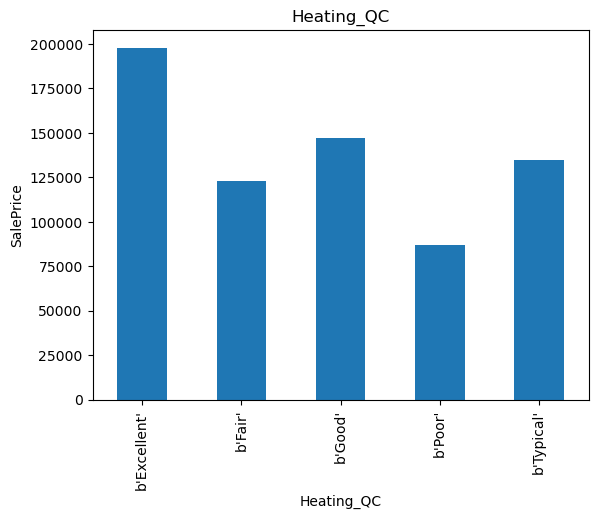

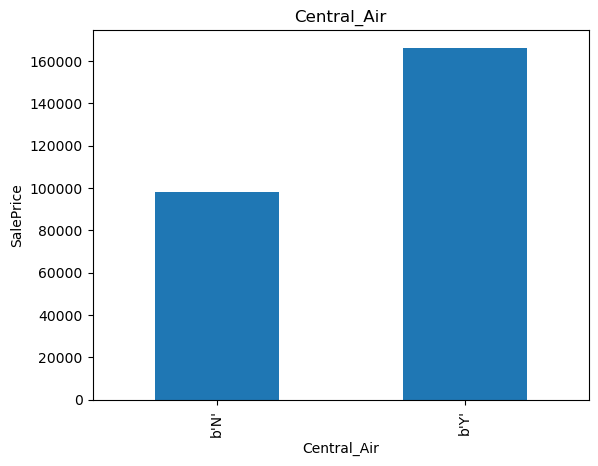

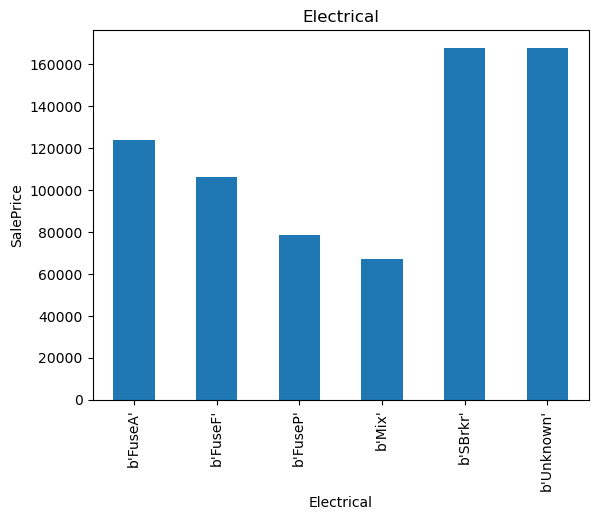

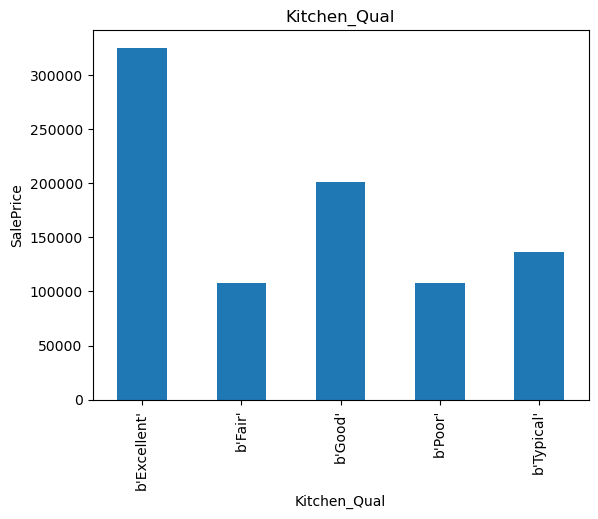

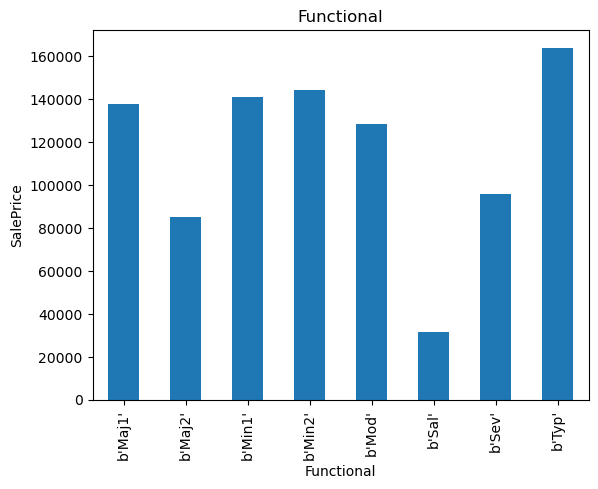

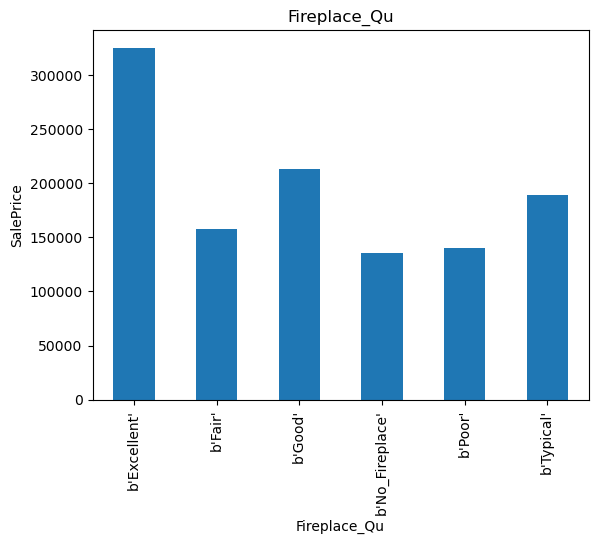

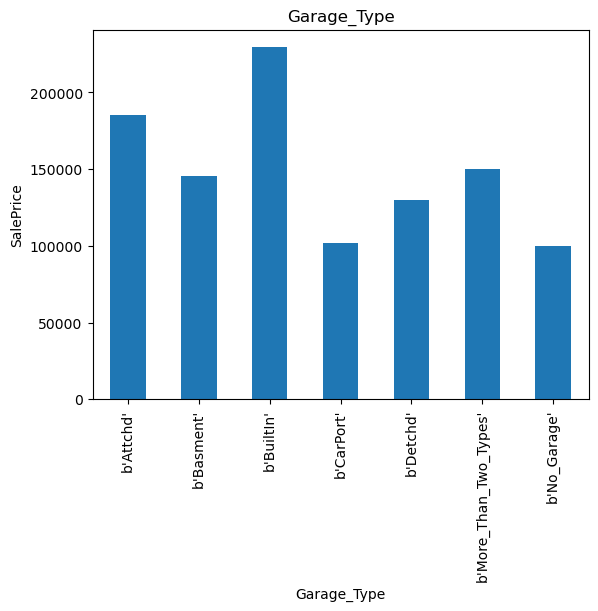

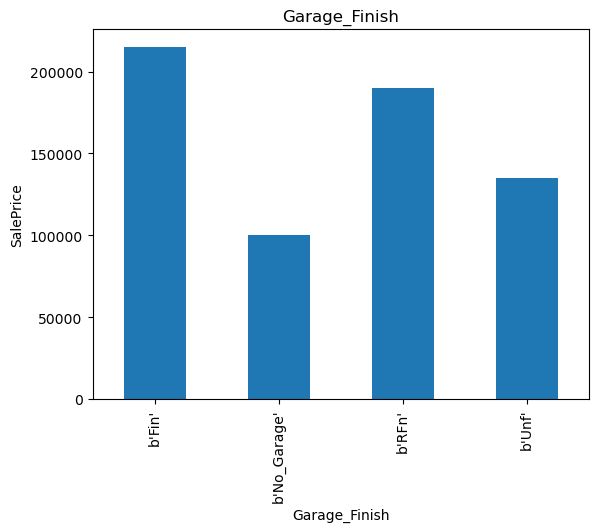

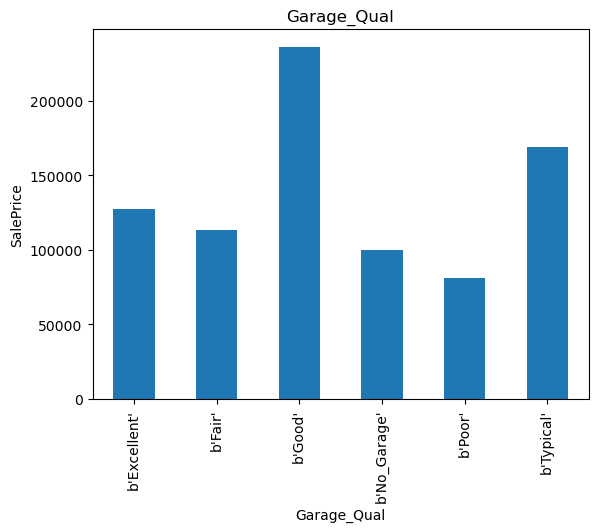

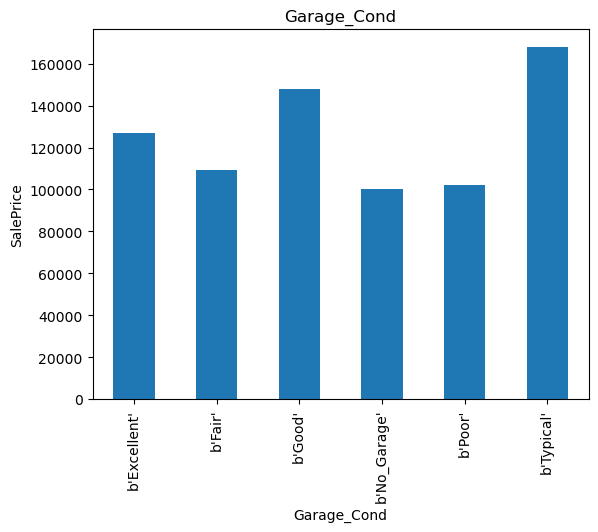

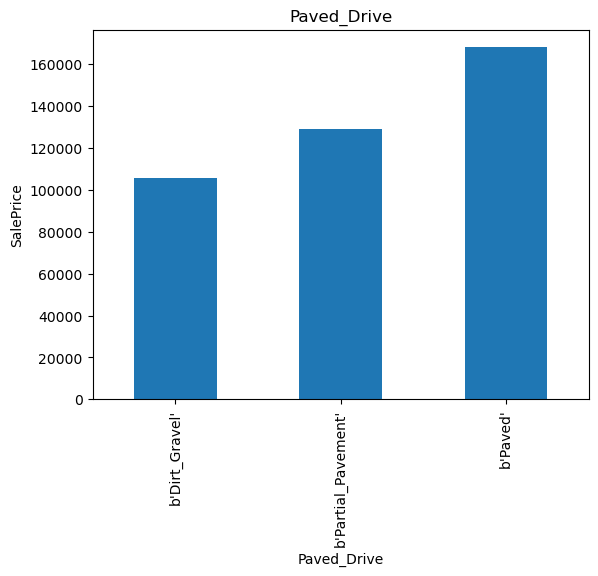

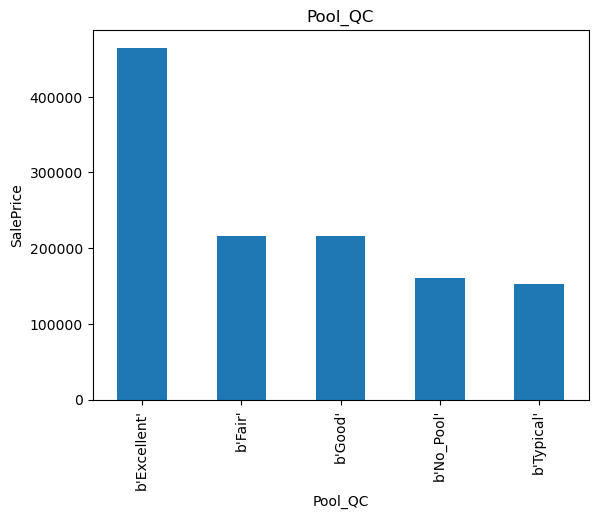

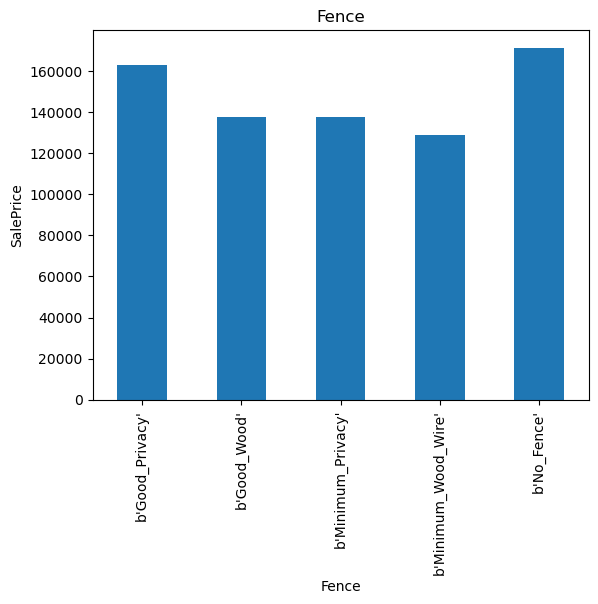

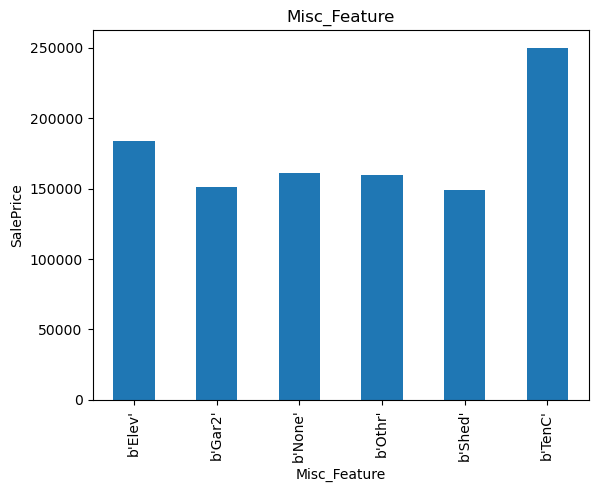

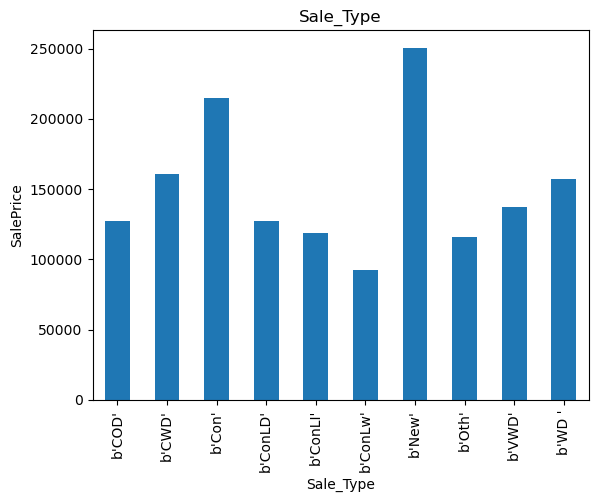

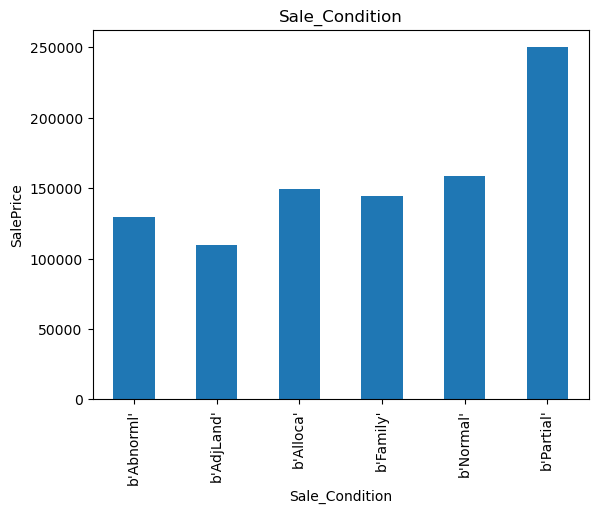

In [1092]:
for feature in categorical_features:
    data=df_data.copy()
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [695]:
#=======FEATURE ENGENEERING========#

In [1093]:
## Temporal Variables (Date Time Variables)

for feature in ["Year_Built"]:
       
    df_data[feature]=df_data['Year_Sold']-df_data[feature]

df_data.head()

MS_SubClass                    MS_Zoning  \
0  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
1  b'One_Story_1946_and_Newer_All_Styles'  b'Residential_High_Density'   
2  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
3  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
4             b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   

   Lot_Frontage  Lot_Area   Street               Alley              Lot_Shape  \
0         141.0   31770.0  b'Pave'  b'No_Alley_Access'  b'Slightly_Irregular'   
1          80.0   11622.0  b'Pave'  b'No_Alley_Access'             b'Regular'   
2          81.0   14267.0  b'Pave'  b'No_Alley_Access'  b'Slightly_Irregular'   
3          93.0   11160.0  b'Pave'  b'No_Alley_Access'             b'Regular'   
4          74.0   13830.0  b'Pave'  b'No_Alley_Access'  b'Slightly_Irregular'   

  Land_Contour  Utilities Lot_Config  ...               Fence Misc_Feature  \
0       b'Lvl'  b'AllPub'  b'Corner'  ...         b'No_Fence'      b'None'   
1       b'Lvl'  b'AllPub'  b'Inside'  ...  b'Minimum_Privacy'      b'None'   
2       b'Lvl'  b'AllPub'  b'Corner'  ...         b'No_Fence'      b'Gar2'   
3       b'Lvl'  b'AllPub'  b'Corner'  ...         b'No_Fence'      b'None'   
4       b'Lvl'  b'AllPub'  b'Inside'  ...  b'Minimum_Privacy'      b'None'   

  Misc_Val Mo_Sold Year_Sold Sale_Type Sale_Condition Sale_Price  Longitude  \
0      0.0     5.0    2010.0    b'WD '      b'Normal'   215000.0 -93.619754   
1      0.0     6.0    2010.0    b'WD '      b'Normal'   105000.0 -93.619756   
2  12500.0     6.0    2010.0    b'WD '      b'Normal'   172000.0 -93.619387   
3      0.0     4.0    2010.0    b'WD '      b'Normal'   244000.0 -93.617320   
4      0.0     3.0    2010.0    b'WD '      b'Normal'   189900.0 -93.638933   

    Latitude  
0  42.054035  
1  42.053014  
2  42.052659  
3  42.051245  
4  42.060899  

[5 rows x 81 columns]

In [1094]:
df_data["Year_Built"].head()

0    50.0
1    49.0
2    52.0
3    42.0
4    13.0
Name: Year_Built, dtype: float64

In [1095]:
import numpy as np

num_features=['Lot_Frontage', 'Lot_Area', 'First_Flr_SF', 'Gr_Liv_Area', 'Sale_Price']

for feature in num_features:
    df_data[feature]=np.log(df_data[feature])

df_data.head()

E:\Program Files\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MS_SubClass                    MS_Zoning  \
0  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
1  b'One_Story_1946_and_Newer_All_Styles'  b'Residential_High_Density'   
2  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
3  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
4             b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   

   Lot_Frontage   Lot_Area   Street               Alley  \
0      4.948760  10.366278  b'Pave'  b'No_Alley_Access'   
1      4.382027   9.360655  b'Pave'  b'No_Alley_Access'   
2      4.394449   9.565704  b'Pave'  b'No_Alley_Access'   
3      4.532599   9.320091  b'Pave'  b'No_Alley_Access'   
4      4.304065   9.534595  b'Pave'  b'No_Alley_Access'   

               Lot_Shape Land_Contour  Utilities Lot_Config  ...  \
0  b'Slightly_Irregular'       b'Lvl'  b'AllPub'  b'Corner'  ...   
1             b'Regular'       b'Lvl'  b'AllPub'  b'Inside'  ...   
2  b'Slightly_Irregular'       b'Lvl'  b'AllPub'  b'Corner'  ...   
3             b'Regular'       b'Lvl'  b'AllPub'  b'Corner'  ...   
4  b'Slightly_Irregular'       b'Lvl'  b'AllPub'  b'Inside'  ...   

                Fence Misc_Feature Misc_Val Mo_Sold Year_Sold Sale_Type  \
0         b'No_Fence'      b'None'      0.0     5.0    2010.0    b'WD '   
1  b'Minimum_Privacy'      b'None'      0.0     6.0    2010.0    b'WD '   
2         b'No_Fence'      b'Gar2'  12500.0     6.0    2010.0    b'WD '   
3         b'No_Fence'      b'None'      0.0     4.0    2010.0    b'WD '   
4  b'Minimum_Privacy'      b'None'      0.0     3.0    2010.0    b'WD '   

  Sale_Condition Sale_Price  Longitude   Latitude  
0      b'Normal'  12.278393 -93.619754  42.054035  
1      b'Normal'  11.561716 -93.619756  42.053014  
2      b'Normal'  12.055250 -93.619387  42.052659  
3      b'Normal'  12.404924 -93.617320  42.051245  
4      b'Normal'  12.154253 -93.638933  42.060899  

[5 rows x 81 columns]

In [1096]:
categorical_features=[feature for feature in df_data.columns if df_data[feature].dtype=='O']
categorical_features

['MS_SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_Type_2',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'Kitchen_Qual',
 'Functional',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Finish',
 'Garage_Qual',
 'Garage_Cond',
 'Paved_Drive',
 'Pool_QC',
 'Fence',
 'Misc_Feature',
 'Sale_Type',
 'Sale_Condition']

In [702]:
#==============# Feature Scaling #===================#

In [1253]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz


In [1258]:
df_old = df_data
df_old

MS_SubClass                    MS_Zoning  \
0     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
1     b'One_Story_1946_and_Newer_All_Styles'  b'Residential_High_Density'   
2     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
3     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
4                b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   
...                                      ...                          ...   
2925                  b'Split_or_Multilevel'   b'Residential_Low_Density'   
2926  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
2927                          b'Split_Foyer'   b'Residential_Low_Density'   
2928  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
2929             b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   

      Lot_Frontage  Lot_Area   Street               Alley  \
0            141.0   31770.0  b'Pave'  b'No_Alley_Access'   
1             80.0   11622.0  b'Pave'  b'No_Alley_Access'   
2             81.0   14267.0  b'Pave'  b'No_Alley_Access'   
3             93.0   11160.0  b'Pave'  b'No_Alley_Access'   
4             74.0   13830.0  b'Pave'  b'No_Alley_Access'   
...            ...       ...      ...                 ...   
2925          37.0    7937.0  b'Pave'  b'No_Alley_Access'   
2926           0.0    8885.0  b'Pave'  b'No_Alley_Access'   
2927          62.0   10441.0  b'Pave'  b'No_Alley_Access'   
2928          77.0   10010.0  b'Pave'  b'No_Alley_Access'   
2929          74.0    9627.0  b'Pave'  b'No_Alley_Access'   

                  Lot_Shape Land_Contour  Utilities  Lot_Config  ...  \
0     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Corner'  ...   
1                b'Regular'       b'Lvl'  b'AllPub'   b'Inside'  ...   
2     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Corner'  ...   
3                b'Regular'       b'Lvl'  b'AllPub'   b'Corner'  ...   
4     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Inside'  ...   
...                     ...          ...        ...         ...  ...   
2925  b'Slightly_Irregular'       b'Lvl'  b'AllPub'  b'CulDSac'  ...   
2926  b'Slightly_Irregular'       b'Low'  b'AllPub'   b'Inside'  ...   
2927             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'  ...   
2928             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'  ...   
2929             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'  ...   

                   Fence Misc_Feature Misc_Val Mo_Sold Year_Sold Sale_Type  \
0            b'No_Fence'      b'None'      0.0     5.0    2010.0    b'WD '   
1     b'Minimum_Privacy'      b'None'      0.0     6.0    2010.0    b'WD '   
2            b'No_Fence'      b'Gar2'  12500.0     6.0    2010.0    b'WD '   
3            b'No_Fence'      b'None'      0.0     4.0    2010.0    b'WD '   
4     b'Minimum_Privacy'      b'None'      0.0     3.0    2010.0    b'WD '   
...                  ...          ...      ...     ...       ...       ...   
2925     b'Good_Privacy'      b'None'      0.0     3.0    2006.0    b'WD '   
2926  b'Minimum_Privacy'      b'None'      0.0     6.0    2006.0    b'WD '   
2927  b'Minimum_Privacy'      b'Shed'    700.0     7.0    2006.0    b'WD '   
2928         b'No_Fence'      b'None'      0.0     4.0    2006.0    b'WD '   
2929         b'No_Fence'      b'None'      0.0    11.0    2006.0    b'WD '   

     Sale_Condition Sale_Price  Longitude   Latitude  
0         b'Normal'   215000.0 -93.619754  42.054035  
1         b'Normal'   105000.0 -93.619756  42.053014  
2         b'Normal'   172000.0 -93.619387  42.052659  
3         b'Normal'   244000.0 -93.617320  42.051245  
4         b'Normal'   189900.0 -93.638933  42.060899  
...             ...        ...        ...        ...  
2925      b'Normal'   142500.0 -93.604776  41.988964  
2926      b'Normal'   131000.0 -93.602680  41.988314  
2927      b'Normal'   132000.0 -93.606847  41.986510  
2928      b'Normal'   1

In [1259]:
from sklearn.preprocessing import OneHotEncoder
 
s = (df_old.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'Kitchen_Qual', 'Functional', 'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Misc_Feature', 'Sale_Type', 'Sale_Condition']
No. of. categorical features:  46


In [1260]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_old[object_cols]))
OH_cols.index = df_old.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = df_old.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [1261]:
df_final

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  Mas_Vnr_Area  \
0            141.0   31770.0      1960.0          1960.0         112.0   
1             80.0   11622.0      1961.0          1961.0           0.0   
2             81.0   14267.0      1958.0          1958.0         108.0   
3             93.0   11160.0      1968.0          1968.0           0.0   
4             74.0   13830.0      1997.0          1998.0           0.0   
...            ...       ...         ...             ...           ...   
2925          37.0    7937.0      1984.0          1984.0           0.0   
2926           0.0    8885.0      1983.0          1983.0           0.0   
2927          62.0   10441.0      1992.0          1992.0           0.0   
2928          77.0   10010.0      1974.0          1975.0           0.0   
2929          74.0    9627.0      1993.0          1994.0          94.0   

      BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  First_Flr_SF  \
0              2.0           0.0        441.0         1080.0        1656.0   
1              6.0         144.0        270.0          882.0         896.0   
2              1.0           0.0        406.0         1329.0        1329.0   
3              1.0           0.0       1045.0         2110.0        2110.0   
4              3.0           0.0        137.0          928.0         928.0   
...            ...           ...          ...            ...           ...   
2925           3.0           0.0        184.0         1003.0        1003.0   
2926           2.0         324.0        239.0          864.0         902.0   
2927           3.0           0.0        575.0          912.0         970.0   
2928           1.0         123.0        195.0         1389.0        1389.0   
2929           4.0           0.0        238.0          996.0         996.0   

      ...  x44_b'New'  x44_b'Oth'  x44_b'VWD'  x44_b'WD '  x45_b'Abnorml'  \
0     ...         0.0         0.0         0.0         1.0             0.0   
1     ...         0.0         0.0         0.0         1.0             0.0   
2     ...         0.0         0.0         0.0         1.0             0.0   
3     ...         0.0         0.0         0.0         1.0             0.0   
4     ...         0.0         0.0         0.0         1.0             0.0   
...   ...         ...         ...         ...         ...             ...   
2925  ...         0.0         0.0         0.0         1.0             0.0   
2926  ...         0.0         0.0         0.0         1.0             0.0   
2927  ...         0.0         0.0         0.0         1.0             0.0   
2928  ...         0.0         0.0         0.0         1.0             0.0   
2929  ...         0.0         0.0         0.0         1.0             0.0   

      x45_b'AdjLand'  x45_b'Alloca'  x45_b'Family'  x45_b'Normal'  \
0                0.0            0.0            0.0            1.0   
1                0.0            0.0            0.0            1.0   
2                0.0            0.0            0.0            1.0   
3                0.0            0.0            0.0            1.0   
4                0.0            0.0            0.0            1.0   
...              ...            ...            ...            ...   
2925             0.0            0.0            0.0            1.0   
2926             0.0            0.0            0.0            1.0   
2927             0.0            0.0            0.0            1.0   
2928             0.0            0.0            0.0            1.0   
2929             0.0            0.0            0.0            1.0   

      x45_b'Partial'  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
2925             0.0  
2926             0.0  
2927             0.0  
2928             0.0  
2929             0.0  

[2930 rows x 353 columns]

In [1262]:
new_data = df_final

In [1263]:

df_old = pd.DataFrame(raw_data[0])
df_old

MS_SubClass                    MS_Zoning  \
0     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
1     b'One_Story_1946_and_Newer_All_Styles'  b'Residential_High_Density'   
2     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
3     b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
4                b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   
...                                      ...                          ...   
2925                  b'Split_or_Multilevel'   b'Residential_Low_Density'   
2926  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
2927                          b'Split_Foyer'   b'Residential_Low_Density'   
2928  b'One_Story_1946_and_Newer_All_Styles'   b'Residential_Low_Density'   
2929             b'Two_Story_1946_and_Newer'   b'Residential_Low_Density'   

      Lot_Frontage  Lot_Area   Street               Alley  \
0            141.0   31770.0  b'Pave'  b'No_Alley_Access'   
1             80.0   11622.0  b'Pave'  b'No_Alley_Access'   
2             81.0   14267.0  b'Pave'  b'No_Alley_Access'   
3             93.0   11160.0  b'Pave'  b'No_Alley_Access'   
4             74.0   13830.0  b'Pave'  b'No_Alley_Access'   
...            ...       ...      ...                 ...   
2925          37.0    7937.0  b'Pave'  b'No_Alley_Access'   
2926           0.0    8885.0  b'Pave'  b'No_Alley_Access'   
2927          62.0   10441.0  b'Pave'  b'No_Alley_Access'   
2928          77.0   10010.0  b'Pave'  b'No_Alley_Access'   
2929          74.0    9627.0  b'Pave'  b'No_Alley_Access'   

                  Lot_Shape Land_Contour  Utilities  Lot_Config  ...  \
0     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Corner'  ...   
1                b'Regular'       b'Lvl'  b'AllPub'   b'Inside'  ...   
2     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Corner'  ...   
3                b'Regular'       b'Lvl'  b'AllPub'   b'Corner'  ...   
4     b'Slightly_Irregular'       b'Lvl'  b'AllPub'   b'Inside'  ...   
...                     ...          ...        ...         ...  ...   
2925  b'Slightly_Irregular'       b'Lvl'  b'AllPub'  b'CulDSac'  ...   
2926  b'Slightly_Irregular'       b'Low'  b'AllPub'   b'Inside'  ...   
2927             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'  ...   
2928             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'  ...   
2929             b'Regular'       b'Lvl'  b'AllPub'   b'Inside'  ...   

                   Fence Misc_Feature Misc_Val Mo_Sold Year_Sold Sale_Type  \
0            b'No_Fence'      b'None'      0.0     5.0    2010.0    b'WD '   
1     b'Minimum_Privacy'      b'None'      0.0     6.0    2010.0    b'WD '   
2            b'No_Fence'      b'Gar2'  12500.0     6.0    2010.0    b'WD '   
3            b'No_Fence'      b'None'      0.0     4.0    2010.0    b'WD '   
4     b'Minimum_Privacy'      b'None'      0.0     3.0    2010.0    b'WD '   
...                  ...          ...      ...     ...       ...       ...   
2925     b'Good_Privacy'      b'None'      0.0     3.0    2006.0    b'WD '   
2926  b'Minimum_Privacy'      b'None'      0.0     6.0    2006.0    b'WD '   
2927  b'Minimum_Privacy'      b'Shed'    700.0     7.0    2006.0    b'WD '   
2928         b'No_Fence'      b'None'      0.0     4.0    2006.0    b'WD '   
2929         b'No_Fence'      b'None'      0.0    11.0    2006.0    b'WD '   

     Sale_Condition Sale_Price  Longitude   Latitude  
0         b'Normal'   215000.0 -93.619754  42.054035  
1         b'Normal'   105000.0 -93.619756  42.053014  
2         b'Normal'   172000.0 -93.619387  42.052659  
3         b'Normal'   244000.0 -93.617320  42.051245  
4         b'Normal'   189900.0 -93.638933  42.060899  
...             ...        ...        ...        ...  
2925      b'Normal'   142500.0 -93.604776  41.988964  
2926      b'Normal'   131000.0 -93.602680  41.988314  
2927      b'Normal'   132000.0 -93.606847  41.986510  
2928      b'Normal'   1

In [1265]:
dfPearson = new_data

In [1266]:
dfPearson.corr()

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  \
Lot_Frontage        1.000000  0.136862    0.026130        0.069509   
Lot_Area            0.136862  1.000000    0.023258        0.021682   
Year_Built          0.026130  0.023258    1.000000        0.612095   
Year_Remod_Add      0.069509  0.021682    0.612095        1.000000   
Mas_Vnr_Area        0.109858  0.125950    0.306797        0.191740   
...                      ...       ...         ...             ...   
x45_b'AdjLand'     -0.007463 -0.020244   -0.077805       -0.078199   
x45_b'Alloca'       0.012826  0.024450   -0.025238       -0.034022   
x45_b'Family'       0.019772  0.018232   -0.036261       -0.049793   
x45_b'Normal'      -0.140954 -0.024052   -0.137162       -0.102775   
x45_b'Partial'      0.166324  0.034169    0.338843        0.323105   

                Mas_Vnr_Area  BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  \
Lot_Frontage        0.109858      0.066707     -0.005254     0.139290   
Lot_Area            0.125950     -0.045760      0.083198     0.023883   
Year_Built          0.306797     -0.179373     -0.027328     0.129311   
Year_Remod_Add      0.191740     -0.050840     -0.061934     0.165397   
Mas_Vnr_Area        1.000000     -0.107222     -0.014955     0.089662   
...                      ...           ...           ...          ...   
x45_b'AdjLand'     -0.018197      0.033194     -0.018848    -0.006382   
x45_b'Alloca'      -0.019554     -0.005527     -0.026711    -0.060993   
x45_b'Family'      -0.017162      0.051439     -0.002085     0.024475   
x45_b'Normal'      -0.065964     -0.097930      0.069230    -0.150107   
x45_b'Partial'      0.145432      0.097465     -0.087552     0.246703   

                Total_Bsmt_SF  First_Flr_SF  ...  x44_b'New'  x44_b'Oth'  \
Lot_Frontage         0.206080      0.241707  ...    0.166197    0.000097   
Lot_Area             0.253765      0.332235  ...    0.032328   -0.003937   
Year_Built           0.407764      0.310463  ...    0.343270   -0.013985   
Year_Remod_Add       0.298393      0.242108  ...    0.325432   -0.027105   
Mas_Vnr_Area         0.393530      0.392280  ...    0.148301   -0.022064   
...                       ...           ...  ...         ...         ...   
x45_b'AdjLand'      -0.042691     -0.028528  ...   -0.019111   -0.003138   
x45_b'Alloca'       -0.044343      0.041764  ...   -0.027083   -0.004447   
x45_b'Family'       -0.003753     -0.000432  ...   -0.037638    0.050057   
x45_b'Normal'       -0.139299     -0.141705  ...   -0.643836   -0.087383   
x45_b'Partial'       0.258007      0.213985  ...    0.986577   -0.014782   

                x44_b'VWD'  x44_b'WD '  x45_b'Abnorml'  x45_b'AdjLand'  \
Lot_Frontage      0.015089   -0.136702        0.018493       -0.007463   
Lot_Area          0.008495   -0.015027       -0.014079       -0.020244   
Year_Built       -0.008161   -0.203243       -0.120844       -0.077805   
Year_Remod_Add    0.012167   -0.156367       -0.146235       -0.078199   
Mas_Vnr_Area      0.024716   -0.093210       -0.040828       -0.018197   
...                    ...         ...             ...             ...   
x45_b'AdjLand'   -0.001185    0.025277       -0.016887        1.000000   
x45_b'Alloca'    -0.001679    0.035820       -0.023931       -0.005828   
x45_b'Family'    -0.002334   -0.014601       -0.033257       -0.008099   
x45_b'Normal'     0.008553    0.620601       -0.568899       -0.138542   
x45_b'Partial'   -0.005582   -0.751912       -0.079545       -0.019371   

                x45_b'Alloca'  x45_b'Family'  x45_b'Normal'  x45_b'Partial'  
Lot_Frontage         0.012826       0.019772      -0.140954        0.166324  
Lot_Area             0.024450       0.018232      -0.024052        0.034169  
Year_Built          -0.025238      -0.036261      -0.137162        0.338843  
Year_Remod_Add      -0.034022      -0.049793      -0.102775        0.323105  
Mas_Vnr_Area        -0.019554      -0.017162      -0.065964        0.145432  
...                       ..

In [1267]:
new_data = dfPearson

In [1182]:
dfPearson = new_data

In [1268]:

prices = dfPearson.corr() 
prices.head()
price = prices["Sale_Price"]
price = pd.DataFrame(price).T


In [1271]:

price.columns


i=0
cont=0
while i < (len(price.columns)):
    price.values[0,i]
    cont += 1
    if cont > 1000:
        print(cont)
        break
    elif price.values[0,i] < (0.000):
        price.drop(price.columns[i],inplace=True,axis=1)
        new_data.drop(new_data.columns[i],inplace=True,axis=1)

    elif i+1 > len(price.columns):
        i += 0
    else :
        i += 1
        


In [1272]:
len(price.columns)

new_data

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  Mas_Vnr_Area  \
0            141.0   31770.0      1960.0          1960.0         112.0   
1             80.0   11622.0      1961.0          1961.0           0.0   
2             81.0   14267.0      1958.0          1958.0         108.0   
3             93.0   11160.0      1968.0          1968.0           0.0   
4             74.0   13830.0      1997.0          1998.0           0.0   
...            ...       ...         ...             ...           ...   
2925          37.0    7937.0      1984.0          1984.0           0.0   
2926           0.0    8885.0      1983.0          1983.0           0.0   
2927          62.0   10441.0      1992.0          1992.0           0.0   
2928          77.0   10010.0      1974.0          1975.0           0.0   
2929          74.0    9627.0      1993.0          1994.0          94.0   

      BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0              0.0        441.0         1080.0        1656.0            0.0   
1            144.0        270.0          882.0         896.0            0.0   
2              0.0        406.0         1329.0        1329.0            0.0   
3              0.0       1045.0         2110.0        2110.0            0.0   
4              0.0        137.0          928.0         928.0          701.0   
...            ...          ...            ...           ...            ...   
2925           0.0        184.0         1003.0        1003.0            0.0   
2926         324.0        239.0          864.0         902.0            0.0   
2927           0.0        575.0          912.0         970.0            0.0   
2928         123.0        195.0         1389.0        1389.0            0.0   
2929           0.0        238.0          996.0         996.0         1004.0   

      ...  x41_b'Fair'  x41_b'Good'  x42_b'No_Fence'  x43_b'Elev'  \
0     ...          0.0          0.0              1.0          0.0   
1     ...          0.0          0.0              0.0          0.0   
2     ...          0.0          0.0              1.0          0.0   
3     ...          0.0          0.0              1.0          0.0   
4     ...          0.0          0.0              0.0          0.0   
...   ...          ...          ...              ...          ...   
2925  ...          0.0          0.0              0.0          0.0   
2926  ...          0.0          0.0              0.0          0.0   
2927  ...          0.0          0.0              0.0          0.0   
2928  ...          0.0          0.0              1.0          0.0   
2929  ...          0.0          0.0              1.0          0.0   

      x43_b'None'  x43_b'TenC'  x44_b'CWD'  x44_b'Con'  x44_b'New'  \
0             1.0          0.0         0.0         0.0         0.0   
1             1.0          0.0         0.0         0.0         0.0   
2             0.0          0.0         0.0         0.0         0.0   
3             1.0          0.0         0.0         0.0         0.0   
4             1.0          0.0         0.0         0.0         0.0   
...           ...          ...         ...         ...         ...   
2925          1.0          0.0         0.0         0.0         0.0   
2926          1.0          0.0         0.0         0.0         0.0   
2927          0.0          0.0         0.0         0.0         0.0   
2928          1.0          0.0         0.0         0.0         0.0   
2929          1.0          0.0         0.0         0.0         0.0   

      x45_b'Partial'  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
2925             0.0  
2926             0.0  
2927             0.0  
2928             0.0  
2929             0.0  

[2930 rows x 148 columns]

In [834]:
df_data = df_old

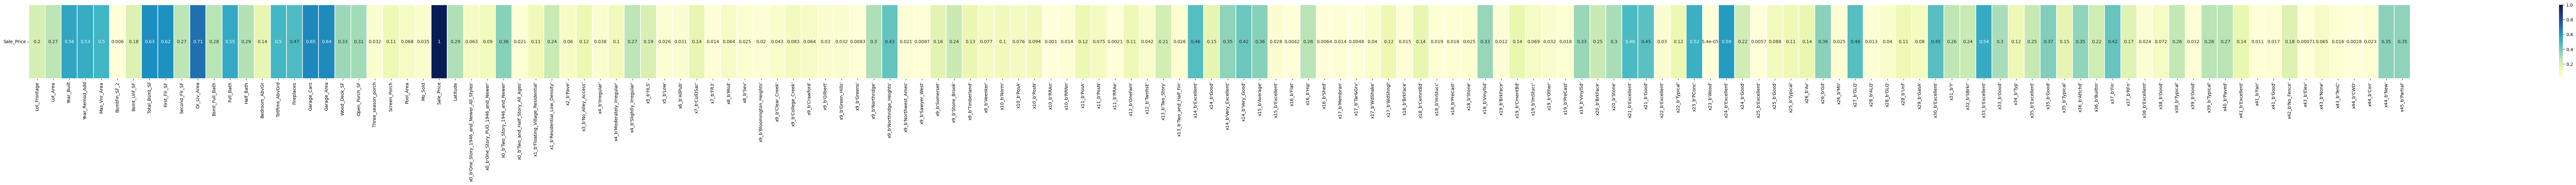

In [1274]:
plt.figure(figsize=(120,3))
sns.heatmap(price,linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [1275]:
new_data

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  Mas_Vnr_Area  \
0            141.0   31770.0      1960.0          1960.0         112.0   
1             80.0   11622.0      1961.0          1961.0           0.0   
2             81.0   14267.0      1958.0          1958.0         108.0   
3             93.0   11160.0      1968.0          1968.0           0.0   
4             74.0   13830.0      1997.0          1998.0           0.0   
...            ...       ...         ...             ...           ...   
2925          37.0    7937.0      1984.0          1984.0           0.0   
2926           0.0    8885.0      1983.0          1983.0           0.0   
2927          62.0   10441.0      1992.0          1992.0           0.0   
2928          77.0   10010.0      1974.0          1975.0           0.0   
2929          74.0    9627.0      1993.0          1994.0          94.0   

      BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0              0.0        441.0         1080.0        1656.0            0.0   
1            144.0        270.0          882.0         896.0            0.0   
2              0.0        406.0         1329.0        1329.0            0.0   
3              0.0       1045.0         2110.0        2110.0            0.0   
4              0.0        137.0          928.0         928.0          701.0   
...            ...          ...            ...           ...            ...   
2925           0.0        184.0         1003.0        1003.0            0.0   
2926         324.0        239.0          864.0         902.0            0.0   
2927           0.0        575.0          912.0         970.0            0.0   
2928         123.0        195.0         1389.0        1389.0            0.0   
2929           0.0        238.0          996.0         996.0         1004.0   

      ...  x41_b'Fair'  x41_b'Good'  x42_b'No_Fence'  x43_b'Elev'  \
0     ...          0.0          0.0              1.0          0.0   
1     ...          0.0          0.0              0.0          0.0   
2     ...          0.0          0.0              1.0          0.0   
3     ...          0.0          0.0              1.0          0.0   
4     ...          0.0          0.0              0.0          0.0   
...   ...          ...          ...              ...          ...   
2925  ...          0.0          0.0              0.0          0.0   
2926  ...          0.0          0.0              0.0          0.0   
2927  ...          0.0          0.0              0.0          0.0   
2928  ...          0.0          0.0              1.0          0.0   
2929  ...          0.0          0.0              1.0          0.0   

      x43_b'None'  x43_b'TenC'  x44_b'CWD'  x44_b'Con'  x44_b'New'  \
0             1.0          0.0         0.0         0.0         0.0   
1             1.0          0.0         0.0         0.0         0.0   
2             0.0          0.0         0.0         0.0         0.0   
3             1.0          0.0         0.0         0.0         0.0   
4             1.0          0.0         0.0         0.0         0.0   
...           ...          ...         ...         ...         ...   
2925          1.0          0.0         0.0         0.0         0.0   
2926          1.0          0.0         0.0         0.0         0.0   
2927          0.0          0.0         0.0         0.0         0.0   
2928          1.0          0.0         0.0         0.0         0.0   
2929          1.0          0.0         0.0         0.0         0.0   

      x45_b'Partial'  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
2925             0.0  
2926             0.0  
2927             0.0  
2928             0.0  
2929             0.0  

[2930 rows x 148 columns]

In [1233]:
df_data.astype(float)

ValueError: could not convert string to float: b'One_Story_1946_and_Newer_All_Styles'

In [8]:
# data preparation
# convert to float to have precise and homogenoues computation
#dataset = new_data.astype(float)

dataset = dfnum
#dataset = df_final.astype(int)
#print("dataset shape", dataset.shape)
#dataset = df_data.astype(float)
#dataset = dfPearson.astype(float)
#dataset = df_dataX.astype(float)
#dataset= df_old.astype(float)
#remove categories with low corr from the main dataframe



# get features
# remove sale price
#X = dataset.iloc[:,0:]
X = dataset.drop(["Sale_Price"],axis=1)

print("X shape", X.shape)

# get target
y = dataset["Sale_Price"]
#y = dataset.iloc[:,0]

print("y shape", y.shape)

X shape (2930, 34)
y shape (2930,)


In [9]:
dataset

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  Mas_Vnr_Area  \
0            141.0   31770.0      1960.0          1960.0         112.0   
1             80.0   11622.0      1961.0          1961.0           0.0   
2             81.0   14267.0      1958.0          1958.0         108.0   
3             93.0   11160.0      1968.0          1968.0           0.0   
4             74.0   13830.0      1997.0          1998.0           0.0   
...            ...       ...         ...             ...           ...   
2925          37.0    7937.0      1984.0          1984.0           0.0   
2926           0.0    8885.0      1983.0          1983.0           0.0   
2927          62.0   10441.0      1992.0          1992.0           0.0   
2928          77.0   10010.0      1974.0          1975.0           0.0   
2929          74.0    9627.0      1993.0          1994.0          94.0   

      BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  First_Flr_SF  \
0              2.0           0.0        441.0         1080.0        1656.0   
1              6.0         144.0        270.0          882.0         896.0   
2              1.0           0.0        406.0         1329.0        1329.0   
3              1.0           0.0       1045.0         2110.0        2110.0   
4              3.0           0.0        137.0          928.0         928.0   
...            ...           ...          ...            ...           ...   
2925           3.0           0.0        184.0         1003.0        1003.0   
2926           2.0         324.0        239.0          864.0         902.0   
2927           3.0           0.0        575.0          912.0         970.0   
2928           1.0         123.0        195.0         1389.0        1389.0   
2929           4.0           0.0        238.0          996.0         996.0   

      ...  Enclosed_Porch  Three_season_porch  Screen_Porch  Pool_Area  \
0     ...             0.0                 0.0           0.0        0.0   
1     ...             0.0                 0.0         120.0        0.0   
2     ...             0.0                 0.0           0.0        0.0   
3     ...             0.0                 0.0           0.0        0.0   
4     ...             0.0                 0.0           0.0        0.0   
...   ...             ...                 ...           ...        ...   
2925  ...             0.0                 0.0           0.0        0.0   
2926  ...             0.0                 0.0           0.0        0.0   
2927  ...             0.0                 0.0           0.0        0.0   
2928  ...             0.0                 0.0           0.0        0.0   
2929  ...             0.0                 0.0           0.0        0.0   

      Misc_Val  Mo_Sold  Year_Sold  Sale_Price  Longitude   Latitude  
0          0.0      5.0     2010.0    215000.0 -93.619754  42.054035  
1          0.0      6.0     2010.0    105000.0 -93.619756  42.053014  
2      12500.0      6.0     2010.0    172000.0 -93.619387  42.052659  
3          0.0      4.0     2010.0    244000.0 -93.617320  42.051245  
4          0.0      3.0     2010.0    189900.0 -93.638933  42.060899  
...        ...      ...        ...         ...        ...        ...  
2925       0.0      3.0     2006.0    142500.0 -93.604776  41.988964  
2926       0.0      6.0     2006.0    131000.0 -93.602680  41.988314  
2927     700.0      7.0     2006.0    132000.0 -93.606847  41.986510  
2928       0.0      4.0     2006.0    170000.0 -93.600190  41.990921  
2929       0.0     11.0     2006.0    188000.0 -93.599996  41.989265  

[2930 rows x 35 columns]

In [12]:
#dataset
print(X.head())
print(y.head())

0    215000.0
1    105000.0
2    172000.0
3    244000.0
4    189900.0
Name: Sale_Price, dtype: float64


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=4)

print (X_train.shape, X_test.shape)

(2197, 34) (733, 34)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

kNN = KNeighborsClassifier(n_neighbors=100)    
kNN.fit( X_train, y_train )
y_pred = kNN.predict( X_test )

# compute accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print ("k: {:2f} | Accuracy {:.3f}".format(k,acc) )    
    
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, alpha=0.1)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_pred, marker='+');

E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


NameError: name 'k' is not defined

E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy 0.00682
Accuracy 0.00546
Accuracy 0.00546


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy 0.00682
Accuracy 0.00682
Accuracy 0.00546


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy 0.00409
Accuracy 0.00136


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy 0.00273
Accuracy 0.00273
Accuracy 0.00273


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy 0.00409
Accuracy 0.00546


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy 0.00546
Accuracy 0.00682
Accuracy 0.00682


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy 0.00819
Accuracy 0.00819


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy 0.00819
Min Accuracy: 0.00136 | Max Accuracy 0.00819 | Avg Accuracy 0.00553


E:\Program Files\Anaconda\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
E:\Program Files\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Sale_Price')

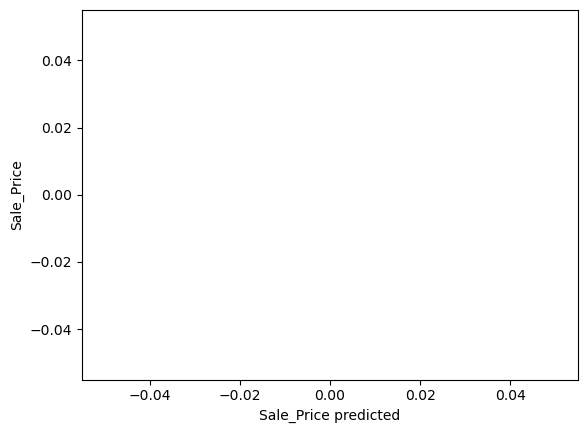

In [16]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


                            
# Create the classifier
for i in range(1,20):
    kNN = KNeighborsClassifier(n_neighbors=i)
    
    # Train the classifier
    kNN.fit(X_train,y_train)

    # Generate predictions
    y_pred = kNN.predict(X_test)

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if i <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print (f"Accuracy {acc:.5f}")

print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(i+1)) )


import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.plot(np.exp(X_train), np.exp(y_train), 'o', alpha=0.1)
axs.plot(np.exp(X_test), np.exp(y_test), 'o', alpha=0.1, c="red")
#axs.axline((0,0), slope = 1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

k:  1 | Accuracy 0.01536
k:  2 | Accuracy 0.00853
k:  3 | Accuracy 0.01024
k:  4 | Accuracy 0.01195
k:  5 | Accuracy 0.01024
k:  6 | Accuracy 0.01024
k:  7 | Accuracy 0.01024
k:  8 | Accuracy 0.00853
k:  9 | Accuracy 0.00853
Min Accuracy: 0.00853 | Max Accuracy 0.01536 | Avg Accuracy 0.01092


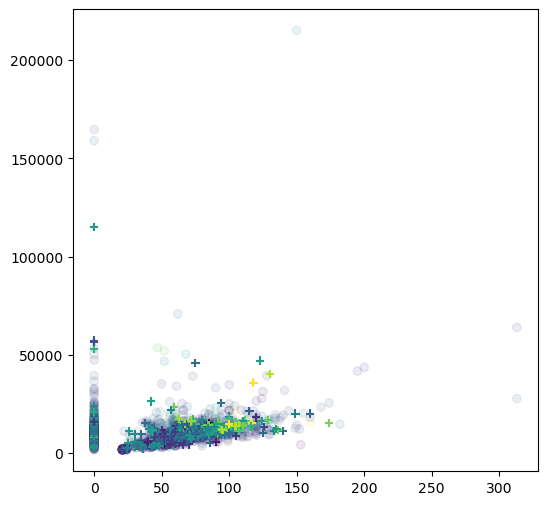

In [34]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
 
for k in range(1,10):
    
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit( scaler.transform(X_train), y_train )
    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )

print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(k+1)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1)
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k:  1 | Accuracy 0.01034
k:  2 | Accuracy 0.01241
k:  3 | Accuracy 0.01344


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k:  4 | Accuracy 0.01138
k:  5 | Accuracy 0.01034


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k:  6 | Accuracy 0.00931
k:  7 | Accuracy 0.00517


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k:  8 | Accuracy 0.00620
k:  9 | Accuracy 0.00620


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k: 10 | Accuracy 0.00827
k: 11 | Accuracy 0.00827


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k: 12 | Accuracy 0.01138
k: 13 | Accuracy 0.01241


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k: 14 | Accuracy 0.01241
k: 15 | Accuracy 0.01448


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k: 16 | Accuracy 0.01551
k: 17 | Accuracy 0.01551


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k: 18 | Accuracy 0.01448
k: 19 | Accuracy 0.01241


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 20 | Accuracy 0.01138
Min Accuracy: 0.00517 | Max Accuracy 0.01551 | Avg Accuracy 0.01103


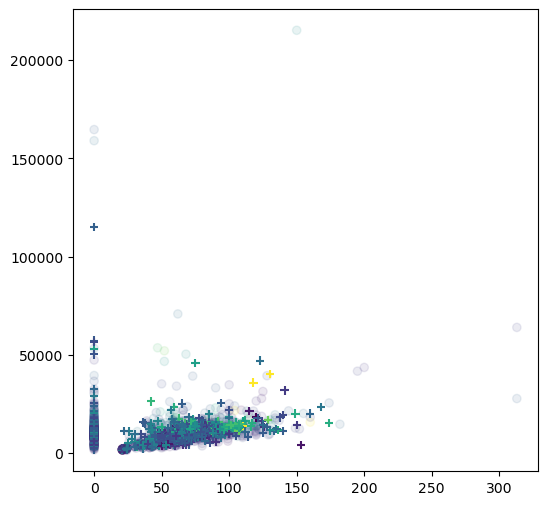

In [18]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

for k in range(1,21):

    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(scaler.transform(X_train),y_train)
    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )

print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(k+1)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1)
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

In [19]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

for k in range(1,21):
    gbm = lgb.LGBMClassifier()
    gbm.fit( scaler.transform(X_train), y_train )
    y_pred = gbm.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc

    if acc < accmin:
        accmin = acc

    if acc > accmax:
        accmax = acc

    accavg += acc
print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1)
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

KeyboardInterrupt: 

E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  1 | Accuracy 0.00414


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  2 | Accuracy 0.00207


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  3 | Accuracy 0.00207


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  4 | Accuracy 0.00103


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  5 | Accuracy 0.00207


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  6 | Accuracy 0.00103


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  7 | Accuracy 0.00103


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  8 | Accuracy 0.00103


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k:  9 | Accuracy 0.00103


E:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 10 | Accuracy 0.00103
Min Accuracy: 0.00103 | Max Accuracy 0.00414 | Avg Accuracy 0.00188


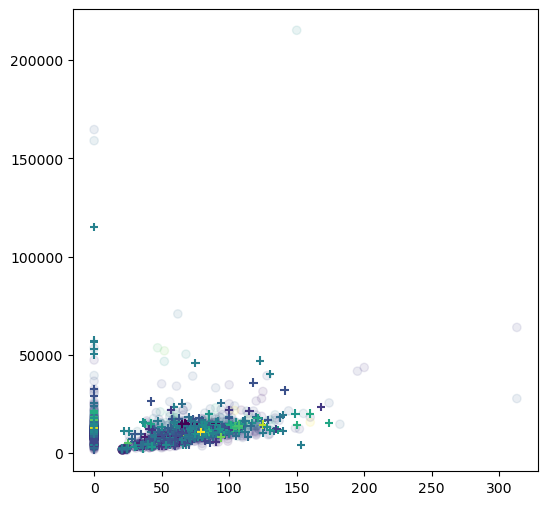

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

def my_distance(a,b):
    return 10*abs(a[0]-b[0]) + abs(a[1]-b[1])

for k in range(1,11):
    
    kNN = KNeighborsClassifier(n_neighbors = k, 
                                         metric = my_distance)
    kNN.fit( X_train ,y_train)
    y_pred = kNN.predict( X_test )

    # compute accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )
    
    
print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(k+1)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1 ,marker='o')
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

In [10]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import pandas as pd

In [1284]:
#=============DECISION TREES==============# 

Train Accuracy: 0.030 - Test Accuracy: 0.012


Text(0.5, 1.0, 'Decision Tree')

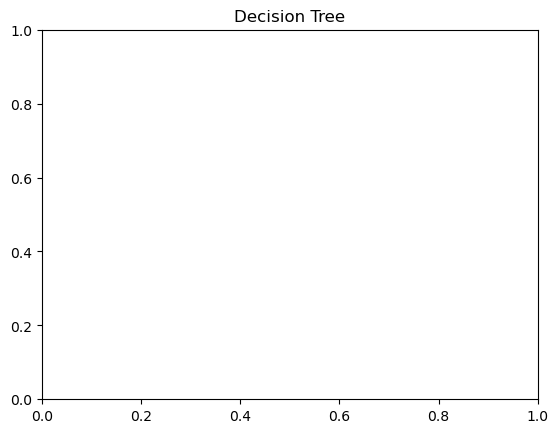

In [21]:
#from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# create a (quasi)random dataset
N_SAMPLES = 1000
N_CENTERS = 6


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = DecisionTreeClassifier(max_depth=52,max_leaf_nodes=12)
dt.fit(X_train,y_train)
# compute Accuracy
train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )

#model_decision_boundary(dt, X_test, y_test)
#plot_decision_boundary(lambda x: dt.predict(x))
plt.title("Decision Tree")

k: 800 | Train Accuracy: 0.545 - Test Accuracy: 0.008
k: 801 | Train Accuracy: 0.545 - Test Accuracy: 0.012
k: 802 | Train Accuracy: 0.546 - Test Accuracy: 0.012
k: 803 | Train Accuracy: 0.545 - Test Accuracy: 0.012
k: 804 | Train Accuracy: 0.547 - Test Accuracy: 0.009
k: 805 | Train Accuracy: 0.547 - Test Accuracy: 0.011
k: 806 | Train Accuracy: 0.548 - Test Accuracy: 0.012
k: 807 | Train Accuracy: 0.548 - Test Accuracy: 0.007
k: 808 | Train Accuracy: 0.548 - Test Accuracy: 0.013
k: 809 | Train Accuracy: 0.548 - Test Accuracy: 0.010
k: 810 | Train Accuracy: 0.550 - Test Accuracy: 0.009
k: 811 | Train Accuracy: 0.550 - Test Accuracy: 0.010
k: 812 | Train Accuracy: 0.552 - Test Accuracy: 0.008
k: 813 | Train Accuracy: 0.551 - Test Accuracy: 0.016
k: 814 | Train Accuracy: 0.552 - Test Accuracy: 0.005
k: 815 | Train Accuracy: 0.553 - Test Accuracy: 0.010
k: 816 | Train Accuracy: 0.552 - Test Accuracy: 0.009
k: 817 | Train Accuracy: 0.554 - Test Accuracy: 0.010
k: 818 | Train Accuracy: 0.5

k: 952 | Train Accuracy: 0.622 - Test Accuracy: 0.006
k: 953 | Train Accuracy: 0.622 - Test Accuracy: 0.009
k: 954 | Train Accuracy: 0.623 - Test Accuracy: 0.008
k: 955 | Train Accuracy: 0.624 - Test Accuracy: 0.010
k: 956 | Train Accuracy: 0.623 - Test Accuracy: 0.010
k: 957 | Train Accuracy: 0.625 - Test Accuracy: 0.009
k: 958 | Train Accuracy: 0.626 - Test Accuracy: 0.007
k: 959 | Train Accuracy: 0.625 - Test Accuracy: 0.010
k: 960 | Train Accuracy: 0.627 - Test Accuracy: 0.007
k: 961 | Train Accuracy: 0.628 - Test Accuracy: 0.010
k: 962 | Train Accuracy: 0.628 - Test Accuracy: 0.010
k: 963 | Train Accuracy: 0.627 - Test Accuracy: 0.010
k: 964 | Train Accuracy: 0.628 - Test Accuracy: 0.009
k: 965 | Train Accuracy: 0.628 - Test Accuracy: 0.007
k: 966 | Train Accuracy: 0.629 - Test Accuracy: 0.008
k: 967 | Train Accuracy: 0.629 - Test Accuracy: 0.011
k: 968 | Train Accuracy: 0.630 - Test Accuracy: 0.010
k: 969 | Train Accuracy: 0.631 - Test Accuracy: 0.008
k: 970 | Train Accuracy: 0.6

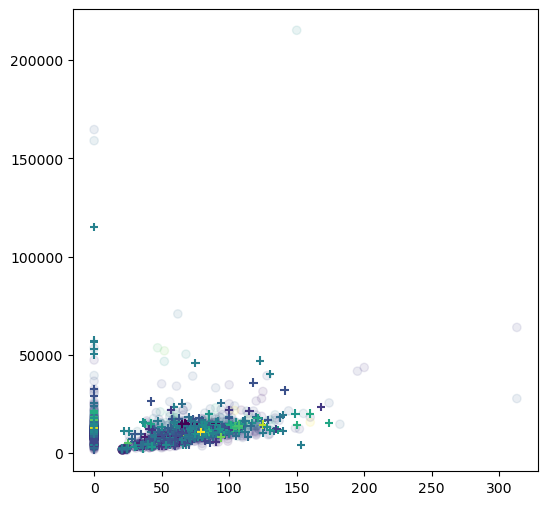

In [22]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#X, y = make_moons(n_samples=1000, noise=0.1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for k in range(800,1000):
    # train and predict
    dt = DecisionTreeClassifier(max_depth=k,max_leaf_nodes=k)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
   
    if k <= 800:
        accmin = train_acc
        accmin2 = test_acc
        accmax = train_acc
        accmax2 = test_acc
        accavg = train_acc
        accavg2 = test_acc
        c = 0
    if acc < accmin:
        accmin = train_acc
        accmin2 = test_acc
    if acc > accmax:
        accmax = train_acc
        accmax2 = test_acc 
        
    accavg += train_acc
    accavg2 += test_acc
    c += 1
    print ("k: {:2d} | Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(k,train_acc,test_acc) )
    #print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )
    
    
print ("Min Train Accuracy: {:.5f} | Max Train Accuracy {:.5f} | Avg Train Accuracy {:.5f}".format(accmin,accmax,accavg/(c)) )
print ("Min Test Accuracy: {:.5f} | Max Test Accuracy {:.5f} | Avg Test Accuracy {:.5f}".format(accmin2,accmax2,accavg2/(c)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1 ,marker='o')
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

In [1287]:
#=================LogisticRegression=================#

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print ("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )

Accuracy: 0.004136504653567736


E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

k:    0.001 - Train Accuracy: 0.012 - Test Accuracy: 0.009
k:    0.010 - Train Accuracy: 0.012 - Test Accuracy: 0.009
k:    0.100 - Train Accuracy: 0.012 - Test Accuracy: 0.009
k:    1.000 - Train Accuracy: 0.015 - Test Accuracy: 0.009
k:   10.000 - Train Accuracy: 0.027 - Test Accuracy: 0.009
k:  100.000 - Train Accuracy: 0.113 - Test Accuracy: 0.014
k: 1000.000 - Train Accuracy: 0.477 - Test Accuracy: 0.019
k: 10000.000 - Train Accuracy: 0.896 - Test Accuracy: 0.014


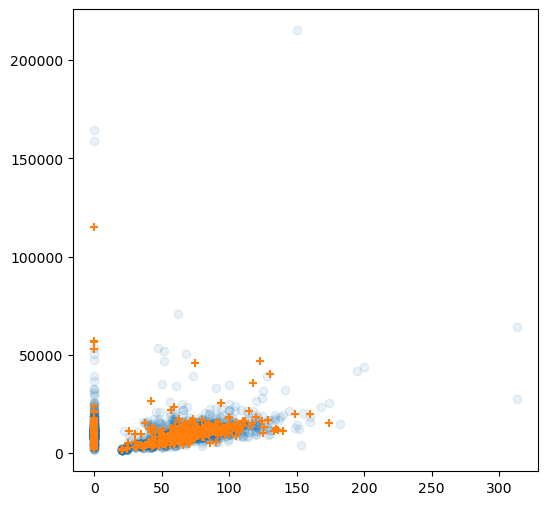

In [25]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

for k in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,10000.0]:
   # train and predict
    model = SVC(C=k)b
    model.fit(X_train, y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, 
                               y_pred = model.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test, 
                               y_pred = model.predict(X_test))
    print ("k: {:8.3f} - Train Accuracy: {:.3f} - Test Accuracy: {:.3f}"
           .format( k, train_acc, test_acc) )
    
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], alpha=0.1 ,marker='o')
ax.scatter(X_test.values[:,0], X_test.values[:,1], marker='+');

In [26]:
X_train.values[:,0]

array([80.,  0., 70., ..., 64., 81., 60.])

In [27]:
X_train.values[:,1]

array([10400., 28698.,  9842., ...,  8791.,  7308.,  7200.])

In [28]:
X_train.values

array([[   80.      , 10400.      ,  1976.      , ...,  2009.      ,
          -93.634694,    42.049654],
       [    0.      , 28698.      ,  1967.      , ...,  2009.      ,
          -93.682565,    42.025546],
       [   70.      ,  9842.      ,  1962.      , ...,  2007.      ,
          -93.621368,    42.041332],
       ...,
       [   64.      ,  8791.      ,  2003.      , ...,  2008.      ,
          -93.639662,    42.050899],
       [   81.      ,  7308.      ,  1920.      , ...,  2008.      ,
          -93.620219,    42.030482],
       [   60.      ,  7200.      ,  1972.      , ...,  2009.      ,
          -93.68317 ,    42.021788]])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# this is a 60/20/20 split
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train, X_valid, y_train, y_valid  = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=42)

accuracies = []

for c in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    # train and predict
    model = SVC(C=c)
    # model.fit(X_train, y_train)

    scores = cross_val_score(model, X_train_80, y_train_80, 
                         cv=5, scoring='accuracy', 
                         verbose = 0)
    
    print (scores)
    valid_acc = scores.mean()
    print ("C: {:8.3f} - Validation Accuracy: {:.3f}"
           .format( c, valid_acc) )
    
    accuracies += [ [valid_acc, c] ]

best_accuracy, best_c = max(accuracies)
print ( "Best C:", best_c )

# here we are using both training and validation,
# to exploit the most data
model = SVC(C=best_c)
model.fit(X_train_80,y_train_80)

test_acc = accuracy_score(y_true = y_test, 
                          y_pred = model.predict(X_test) )
print ("Test Accuracy: {:.3f}".format(test_acc) )

E:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.01279318 0.01279318 0.01066098 0.01066098 0.01282051]
C:    0.001 - Validation Accuracy: 0.012


E:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.01279318 0.01279318 0.01066098 0.01066098 0.01282051]
C:    0.010 - Validation Accuracy: 0.012


E:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.01279318 0.01279318 0.01066098 0.01066098 0.01282051]
C:    0.100 - Validation Accuracy: 0.012


E:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.01279318 0.01279318 0.01066098 0.01066098 0.01068376]
C:    1.000 - Validation Accuracy: 0.012


E:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.01066098 0.01918977 0.01705757 0.01279318 0.01068376]
C:   10.000 - Validation Accuracy: 0.014


E:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.01279318 0.01492537 0.01279318 0.01918977 0.02350427]
C:  100.000 - Validation Accuracy: 0.017


E:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.01279318 0.00426439 0.00852878 0.01918977 0.01709402]
C: 1000.000 - Validation Accuracy: 0.012
Best C: 100.0
Test Accuracy: 0.014


In [ ]:
#=======ENSAMBLE METHODS=============#

In [30]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_leaf_nodes=4)
adaboost = AdaBoostClassifier(dt, n_estimators=10)

adaboost.fit(X,y)
print ("Accuracy: {:.3f}".format( accuracy_score(y_true=y, 
                                                 y_pred=adaboost.predict(X)) ) )


# compute the decition map
x_min, x_max = X.iloc[:, 0].min(), X[:, 0].max()
y_min, y_max = X.iloc[:, 1].min(), X[:, 1].max()
zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 50) 
               for yy in np.linspace(y_min, y_max, 50) ]
zz = np.array(zz)
Z = adaboost.predict(zz)

# plot data and decision map
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c=y, s=100)
ax.scatter(zz[:,0], zz[:,1], c=Z, marker='+', alpha=0.3);

Accuracy: 0.021


InvalidIndexError: (slice(None, None, None), 0)

In [31]:
# Convert the data into the appropriate format for XGBoost
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
params = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "eval_metric": "error",
    "eta": 0.1,
    "max_depth": 10,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "seed": 42
}

num_boost_round = 500
model = xgb.train(params,label=1 ,dtrain, num_boost_round=num_boost_round)

# Make predictions on the test data
y_pred = model.predict(dtest)

# Convert the predictions into binary class labels
y_pred_binary = np.round(y_pred)

# Evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(acc * 100))

SyntaxError: positional argument follows keyword argument (1093001971.py, line 20)

In [ ]:
#===========RANDOM FOREST============#

In [33]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

N_TESTS = 20

stats = np.array([])

n_leaves = range(2,101)

for l in n_leaves:
    y_preds = np.array([])
    
    for i in range(N_TESTS):
        Xs, ys = resample(X,y, n_samples=int(0.67*len(y)) )

        # train a decision tree classifier
        dt = DecisionTreeClassifier(max_leaf_nodes=l)
        dt.fit(Xs,ys)
        
        y_pred  = dt.predict(X)
        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred

    # actual y vs. avg prediction
    dt_bias     = (y-np.mean(y_preds,axis=1))**2
    # variance of predictions
    dt_variance = np.var(y_preds,axis=1)
    # MSE error (even if this is classification)
    dt_error    = 0.0
    
    run_stats = np.array([dt_error.mean(), dt_bias.mean(), dt_variance.mean()])
    
    stats = np.column_stack( [stats, run_stats]) if stats.size else run_stats
    
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(n_leaves,stats[0,:], 'o:', label='Error')
ax.plot(n_leaves,stats[1,:], 'o:', label='Bias$^2$')
ax.plot(n_leaves,stats[2,:], 'o:', label='Variance')
ax.set_xlabel('Number of leaves')
ax.grid()
ax.legend()

print ("Error/Bias/Variance at the last iteration:", stats[:,-1])

AttributeError: 'float' object has no attribute 'mean'